In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import accuracy_score

## July 2023 analysis 

In [4]:
month_df = pd.read_csv("/home/ksg502/projects/frame-align/data/raw/2023-24/July-23/datawithmetatopics_merged.csv")

In [40]:
data_path = Path("/home/ksg502/projects/frame-align/data/raw/2023-24/")
examples = 0
for month in data_path.iterdir():
    df = pd.read_csv(month / "datawithtopics_merged.csv")
    examples += len(df)

In [ ]:
examples

1870209

In [7]:
data_path = Path("../data/raw/2023-24/")
topics = []
for month_dir in data_path.iterdir():
    df = pd.read_csv(month_dir/"datawithtopics_merged.csv")
    topics.extend(df['auto_topic_label'].unique().tolist())
topics = list(set(topics))

In [11]:
topic_samples_annotated = pd.read_json("/home/ksg502/projects/frame-align/data/annotated/topic_sampled_jul23_annotated_Mistral.jsonl", lines=True)  

In [12]:
len(topic_samples_annotated)

450

In [6]:
merged_df = pd.concat([topic_samples, topic_samples_annotated], axis=1)

In [7]:
merged_df.columns

Index(['topic', 'auto_topic_label', 'title', 'authors', 'date_download',
       'date_modify', 'date_publish', 'description', 'filename', 'image_url',
       'language', 'localpath', 'maintext', 'source_domain', 'title_page',
       'title_rss', 'url', 'id', 'meta-topic', 'meta-topic-short', 'summary',
       'entities', 'frame_justification', 'frame_id', 'frame_name', 'tone',
       'justification_tone', 'issue_frame_justification', 'issue_frame',
       'article_text', 'title', 'id', 'uuid', 'topic_justification', 'topic',
       'justification_tones'],
      dtype='object')

In [8]:
merged_df[['id', 'uuid', 'auto_topic_label', 'article_text', 'title', 'meta-topic', 'meta-topic-short', 'summary',
       'entities', 'frame_justification', 'frame_id', 'frame_name', 'tone',
       'justification_tone', 'issue_frame_justification', 'issue_frame', 'topic_justification', 'topic',
       'justification_tones']].to_csv("../data/annotated/merged_topic_samples_jul23.csv", index=False)

In [16]:
merged_df = pd.read_csv("../data/annotated/merged_topic_samples_jul23.csv", index_col=0)

In [17]:
merged_df.dropna(subset=['frame_name'], inplace=True)
merged_df['meta-topic-short'].value_counts()

meta-topic-short
Animals                    10
Conflict                   10
Community                  10
Economics                  10
Crime                      10
Environment                10
Education                  10
Entertainment              10
International Aid          10
Human Rights               10
Immigration                10
History                    10
Geopolitics                10
Sports                     10
Travel                     10
Wildlife                   10
Social Issues              10
Politics                   10
Literature                 10
News                       10
Weather                    10
Military                   10
Religion                   10
Health                      9
Business                    9
Accidents                   9
Economy                     9
Culture                     9
Human Interest              9
World                       9
Workplace                   9
Obituaries                  9
Local News             

In [19]:
len(merged_df)

414

/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout

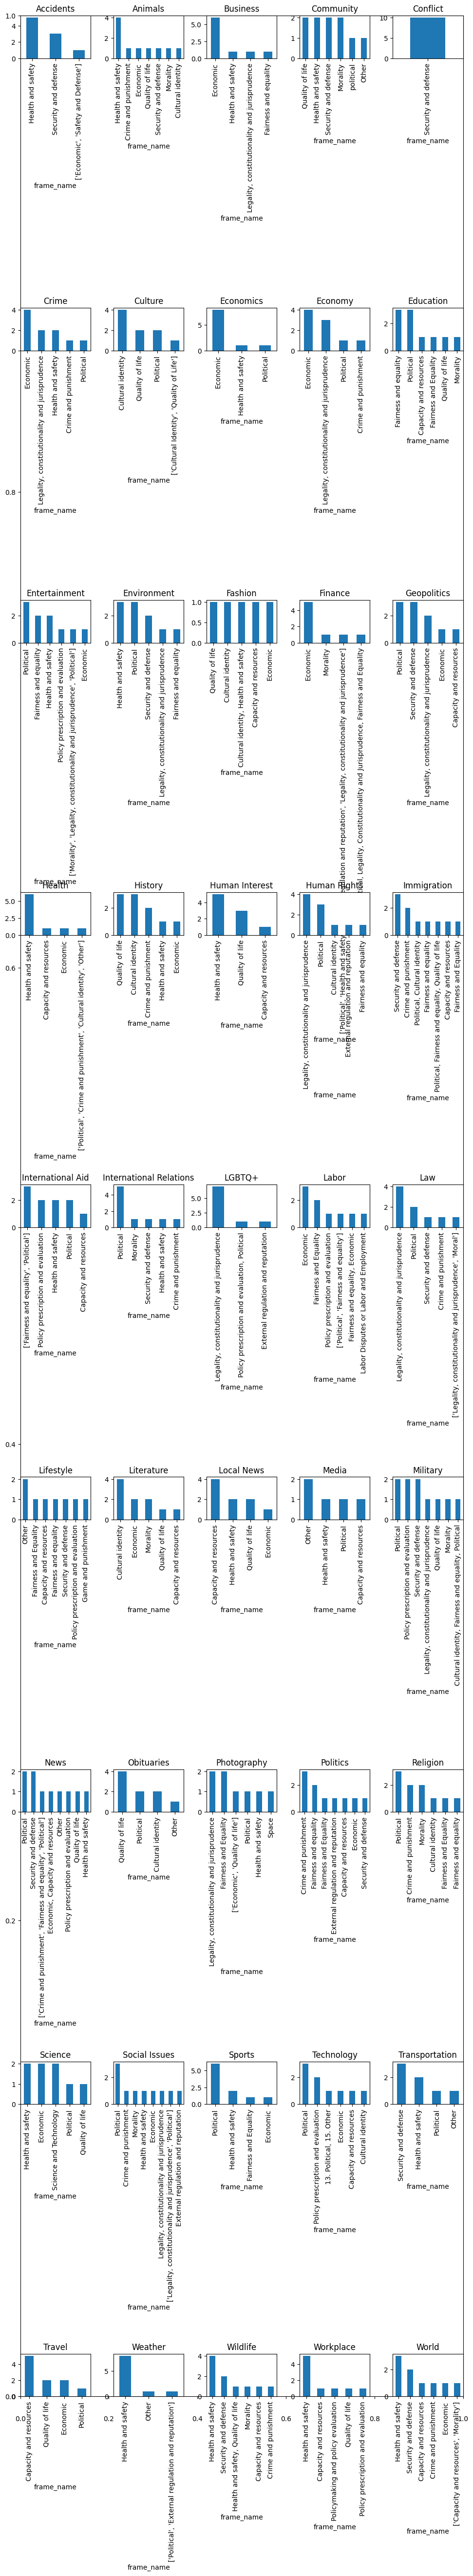

In [23]:
plt.subplots(figsize=(10, 50))
plt.tick_params(axis='x', which='major', pad=25)
for i, (group_name, group) in enumerate(merged_df.groupby('meta-topic-short')):
    plt.subplot(9, 5, i+1)
    group['frame_name'].value_counts().plot(kind='bar', xlabel=None)
    plt.title(group_name)
    plt.tight_layout()
# plt.savefig("../data/figures/frames_by_meta_topic_jul23.png")

## Topic samples

In [3]:
meta_topic_dict = json.load(open("../data/raw/meta_topics.json", "r"))

In [9]:
data_path = Path("../data/raw/2023-24/")
combined_topic_df = []
for month_dir in data_path.iterdir():
    df = pd.read_csv(month_dir/"datawithtopics_merged.csv")
    df['month'] = month_dir.name
    combined_topic_df.append(df[['id','month','auto_topic_label']])

In [2]:
combined_topic_df = pd.read_csv("../data/raw/2023-24/combined_topics.csv")

In [6]:
merged_meta_topic = json.load(open("/home/ksg502/projects/frame-align/data/raw/merged_meta_topics.json"))

In [4]:
combined_topic_df['meta-topic'].value_counts()

meta-topic
Crime                   872859
no_topic                237441
Sports                  146303
Politics                135272
Society                 120716
                         ...  
Urban Development           14
Social Policy               11
Legal/Politics              10
Hospitality                 10
Business/Agriculture        10
Name: count, Length: 171, dtype: int64

In [8]:
topic_samples = []
for _, group in combined_topic_df.groupby('meta-topic'):
    topic_samples.append(group.sample(10))
topic_sample_df = pd.concat(topic_samples)
topic_sample_df.to_csv("../data/raw/topic_sampled_all.csv")

In [2]:
topic_sample_df = pd.read_csv("../data/raw/topic_sampled_all.csv", index_col=0)

In [4]:
samples_with_data = []
for _, group in topic_sample_df.groupby('month'):
    month_df = pd.read_csv(f"../data/raw/2023-24/{group_name}/datawithtopics_merged.csv")
    samples_with_data.append(month_df[month_df['uuid'].isin(group['uuid'])])
samples_with_data = pd.concat(samples_with_data)
samples_with_data.to_csv("../data/raw/topic_sampled_all_with_data.csv")

month
May-23          272
June-23         234
July-23         223
August-23       166
September-23    156
April-24        144
March-24        109
October-23      100
December-23      91
January-24       86
February-24      71
November-23      58
Name: count, dtype: int64

In [19]:
df = pd.read_csv("../data/raw/2023-24/topic_samples.csv")

In [23]:
df.topic_label.value_counts()

topic_label
Miscellaneous                  722
Government and Politics        477
Law and Justice                202
Sports                         197
Business and Agriculture       125
News and Current Events        118
Unusual News                    99
Society and Culture             81
Travel and Tourism              68
Transportation                  54
Consumer Protection             54
Education and Technology        51
Human Interest                  50
Finance                         38
Infrastructure                  37
Disasters and Accidents         36
Gambling and Lottery            36
Obituaries                      34
Activism and Human Rights       31
Nature and Wildlife             31
Entertainment                   31
Health and Wellness             30
Media and Advertising           29
Family and Relationships        28
Terrorism                       26
Religion                        26
Accidents                       26
Demographics                    24
Recreati

### Output Analysis

In [2]:
og_df = pd.read_csv("/projects/copenlu/data/arnav/frame-align/raw/2023-24/topic_samples.csv")

In [3]:
text_df = pd.read_json("../data/annotated/text/topic_samples_Mistral.jsonl", lines=True)
vision_df = pd.read_json("../data/annotated/vision/topic_samples_llava.jsonl", lines=True)

In [4]:
print(len(og_df), len(text_df), len(vision_df))

740 745 695


In [13]:
print(og_df.id.nunique(), text_df.id.nunique(), vision_df.uuid.nunique())

740 740 695


In [7]:
for col in text_df.columns:
    if col not in ['article_text', 'title', 'id']:
        print(col, len(text_df[col].dropna()))

topic_justification 518
topic 512
summary 717
frame_justification 692
frame_id 679
frame_name 679
issue_frame_justification 743
issue_frame 724
entity_name 256
justification_sentiment 246
entity_sentiment 256
justification_sentment 10
justification_for_sentiment 1


In [9]:
for col in vision_df.columns:
    if col not in ['article_text', 'title', 'uuid']:
        print(col, len(vision_df[col].dropna()))

caption 685
main-actor 682
sentiment 682
sentiment-justification 682
facial-expression 682
facial-expression-justification 682
perceivable-gender 682
perceivable-gender-justification 677
symbolic-object 695
symbolic-meaning 695
symbolic-meaning-explanation 695
frame-id 690
frame-name 690
frame-justification 689
image_url 695
frame-jusitification 1


In [10]:
merged_df = text_df.merge(vision_df, left_on='id', right_on='uuid', how='inner')

In [18]:
merged_df = merged_df.merge(og_df, left_on='id', right_on='id', how='inner')

In [15]:
vision_df.columns

Index(['caption', 'main-actor', 'sentiment', 'sentiment-justification',
       'facial-expression', 'facial-expression-justification',
       'perceivable-gender', 'perceivable-gender-justification',
       'symbolic-object', 'symbolic-meaning', 'symbolic-meaning-explanation',
       'frame-id', 'frame-name', 'frame-justification', 'image_url', 'title',
       'uuid', 'frame-jusitification'],
      dtype='object')

In [41]:
og_df['topic_label'].value_counts()

topic_label
Games        10
Food         10
Insurance    10
Religion     10
Consumer     10
             ..
Events       10
Culture      10
Charity      10
Terrorism    10
no_topic     10
Name: count, Length: 74, dtype: int64

In [39]:
vision_df['frame-name'].value_counts()

frame-name
Economic                                         247
Political                                        149
Cultural identity                                 70
Crime and punishment                              59
External regulation and reputation                53
Legality, constitutionality and jurisprudence     35
Legality, Constitutionality and Jurisprudence     23
Morality                                          17
Health and safety                                 14
None                                              13
Wordle                                             2
Flower Demo                                        1
4 Things to Do                                     1
Cancelled                                          1
Voodoo Ranger                                      1
Polar Jet Stream                                   1
We Love Kind                                       1
Weather                                            1
Security and defense               

In [40]:
text_df['frame_name'].value_counts()

frame_name
Economic                                                                  122
Health and safety                                                         121
Quality of life                                                            59
Capacity and resources                                                     58
Security and defense                                                       55
Morality                                                                   38
Political                                                                  34
Cultural identity                                                          34
Crime and punishment                                                       24
Fairness and Equality                                                      24
Legality, constitutionality and jurisprudence                              23
Policy prescription and evaluation                                         22
Fairness and equality                                

Accidents
Advertising
Agriculture
Archaeology
Arts
Astrology
Automotive
Aviation
Business
Celebrity
Charity
Conflict
Consumer
Crime
Culture
Demographics
Economy
Education
Energy
Entertainment
Environment


/tmp/ipykernel_2958711/749406338.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


Events
Family
Fashion
Finance
Food
Gambling
Games
Health
History
Humanitarian
Immigration
Infrastructure
Insurance
International Aid
International Relations
Labor
Law
Law Enforcement
Lifestyle


/tmp/ipykernel_2958711/749406338.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Literature
Lottery
Media
Military
Miscellaneous
Natural Disasters
Nature
News
Obituary
Odd News
Outdoors
Pets
Photography
Politics
Psychology
Real Estate
Relationships
Religion
Royalty
Safety
Science
Shopping
Social Issues
Society
Sports
Technology
Terrorism
Traffic
Transportation
Travel
Urban Development
Weather
Wildlife
no_topic


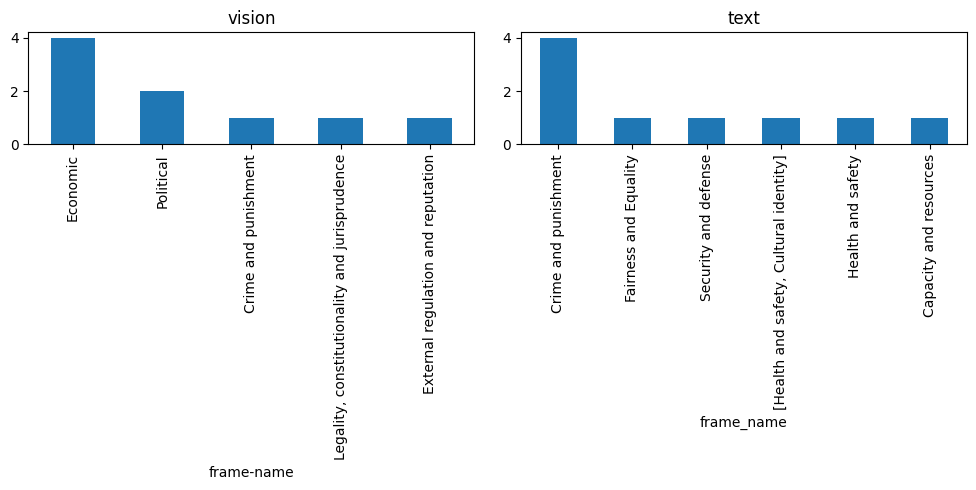

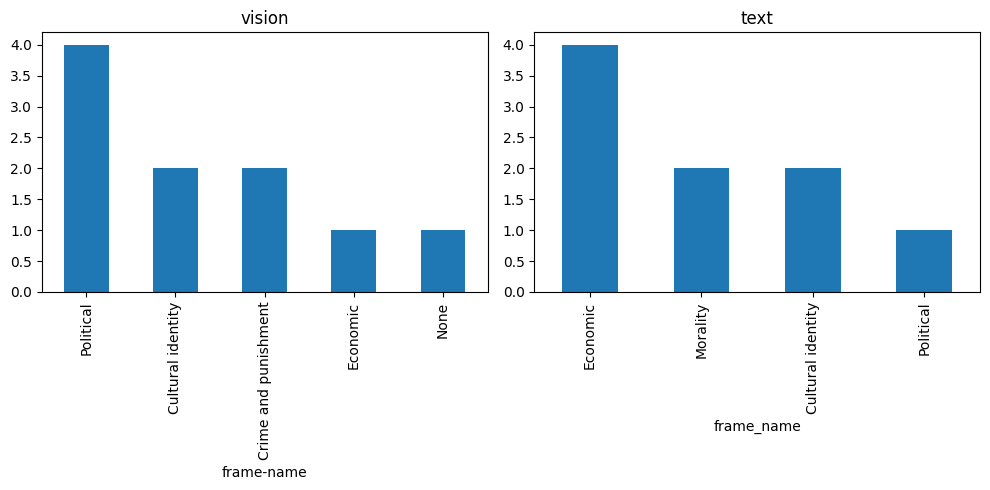

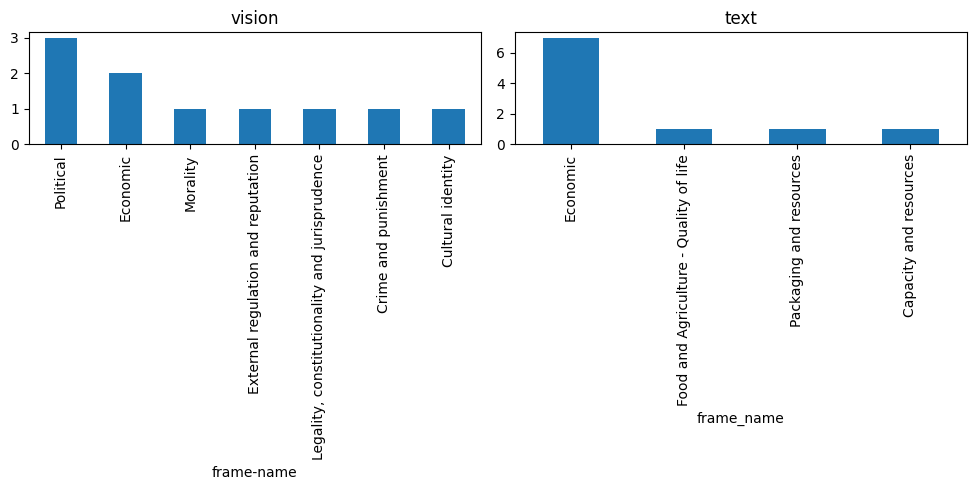

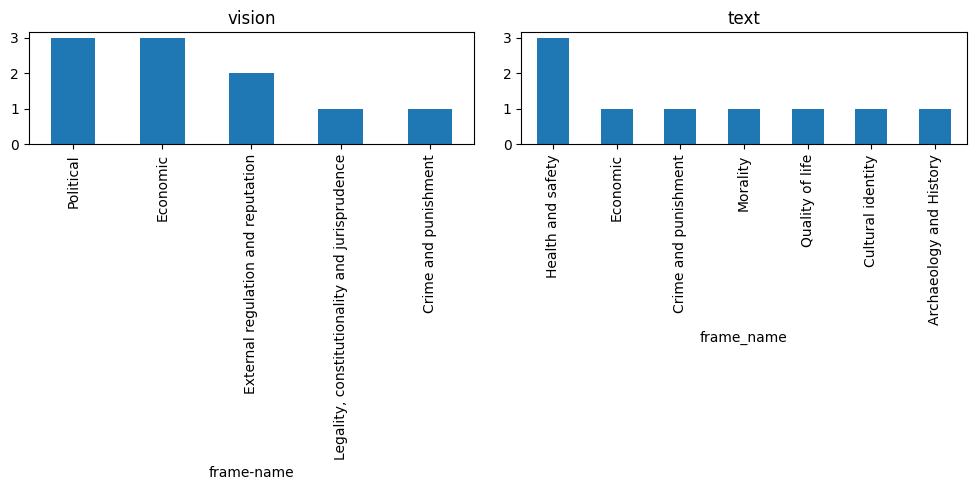

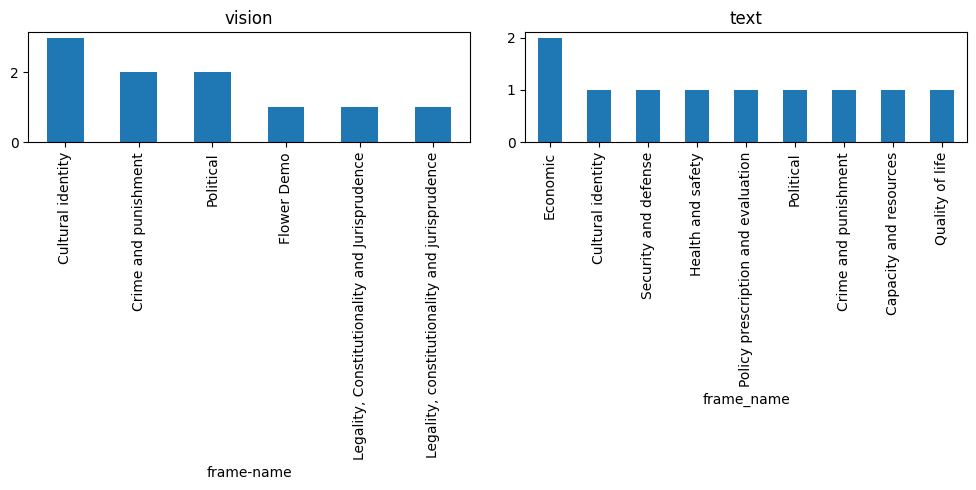

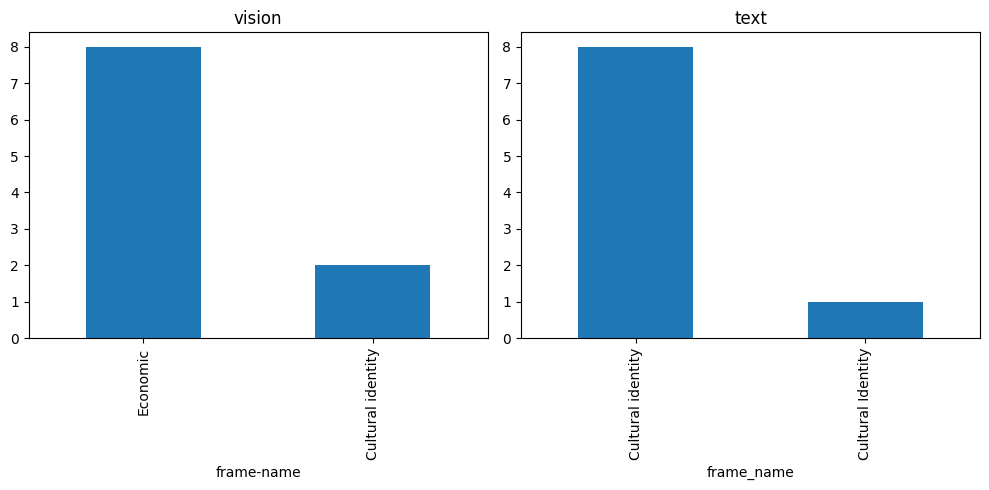

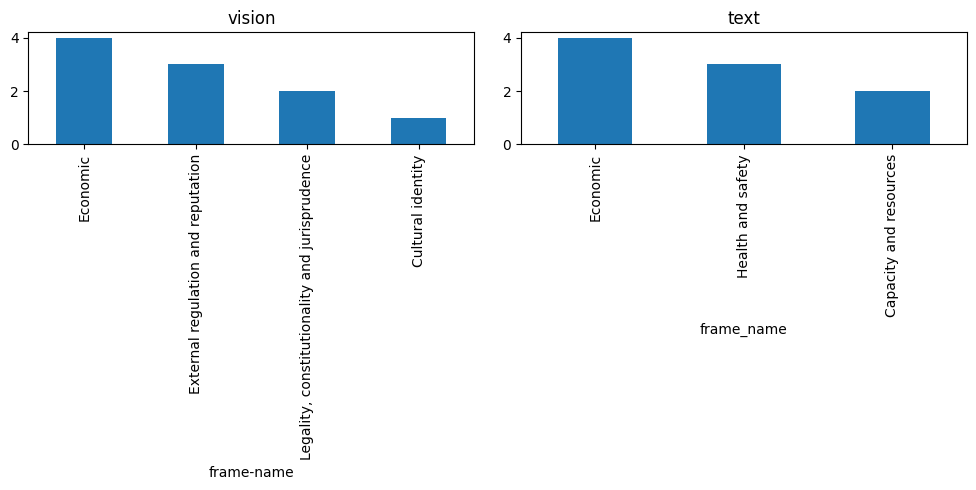

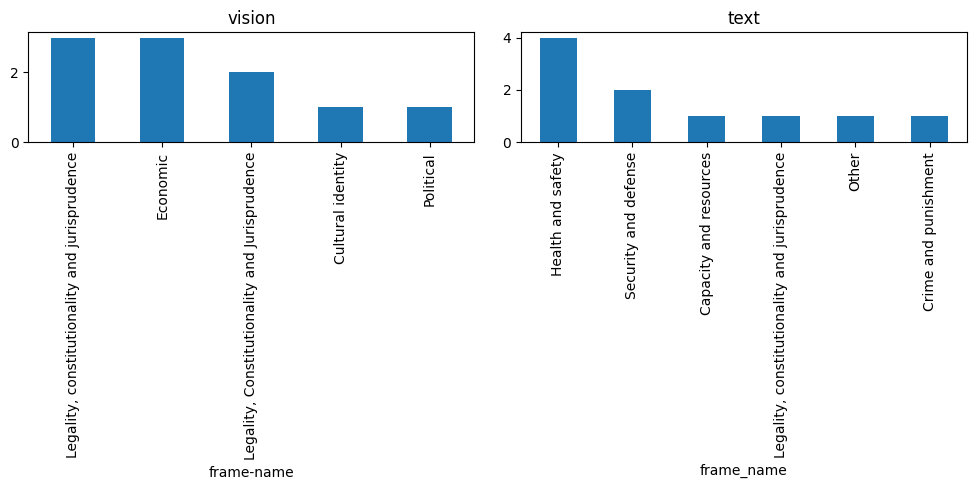

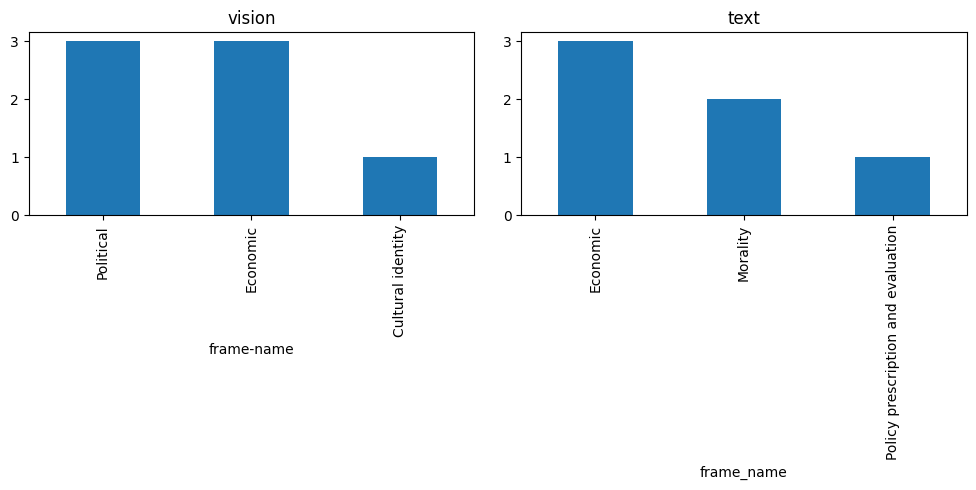

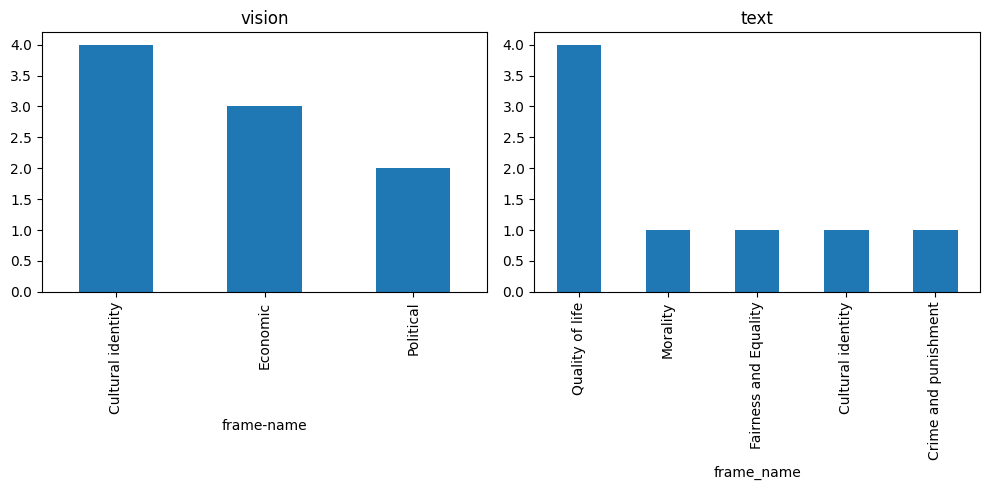

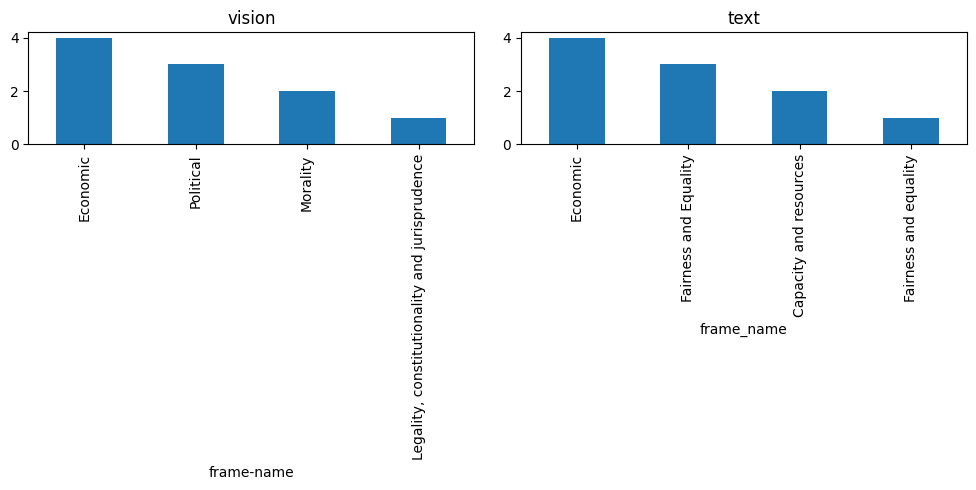

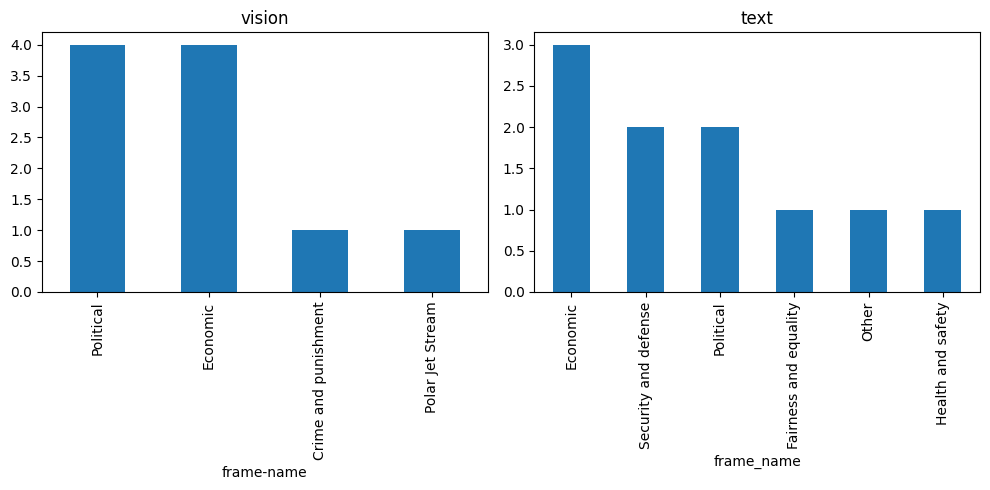

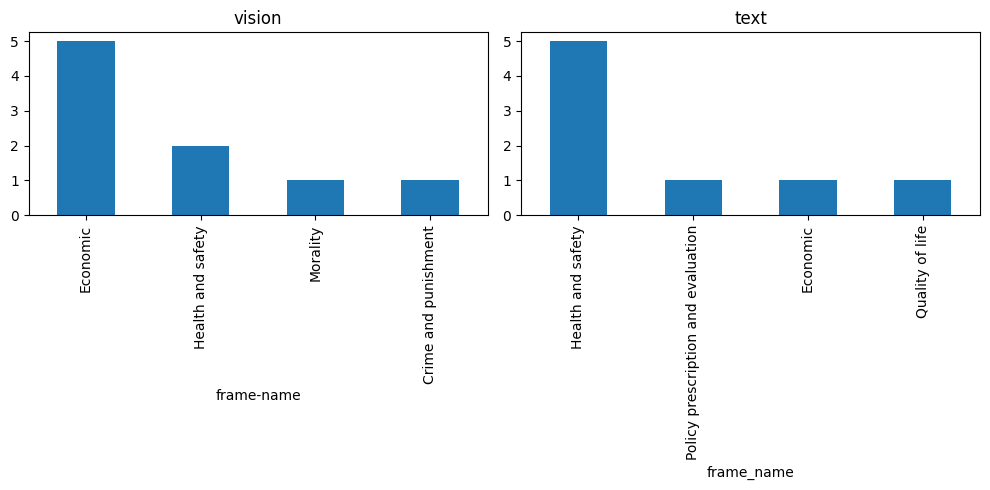

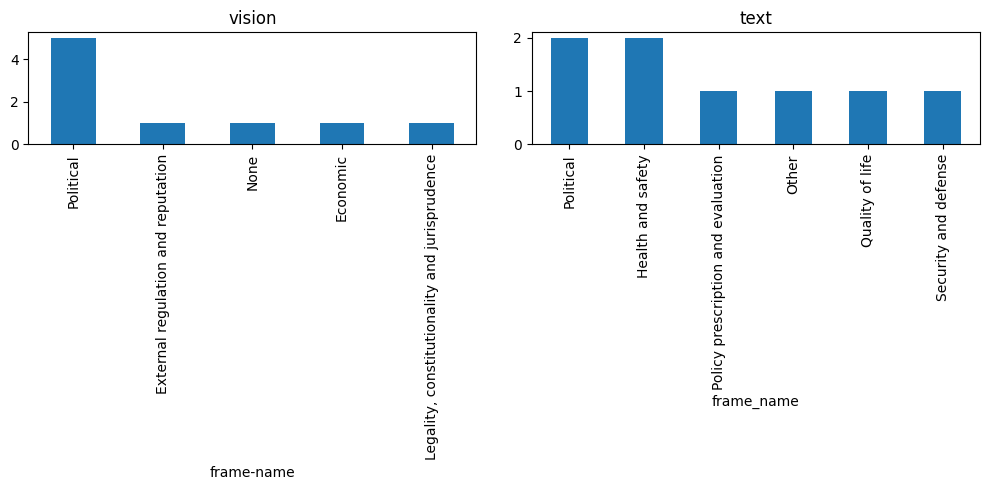

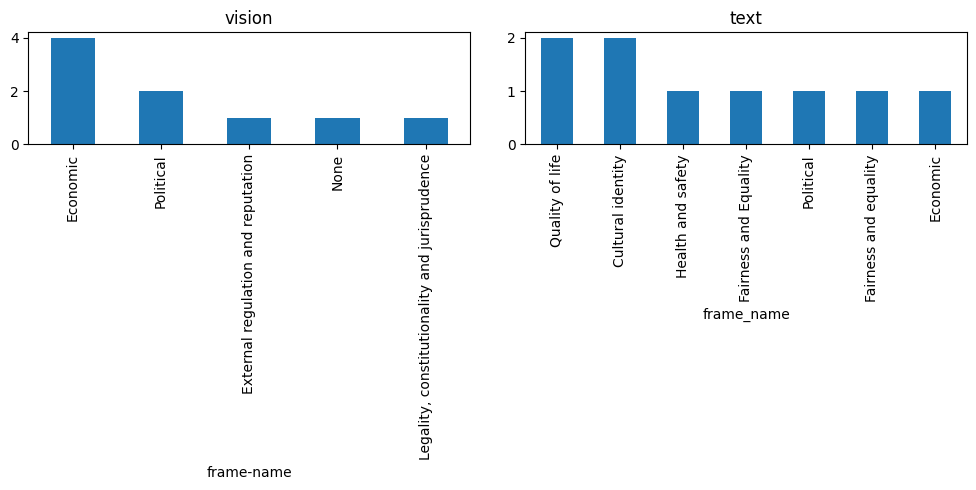

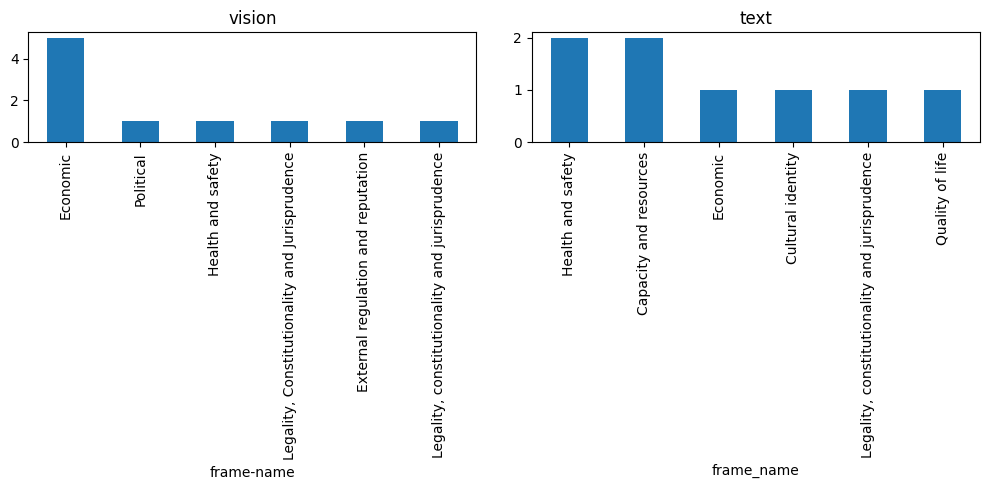

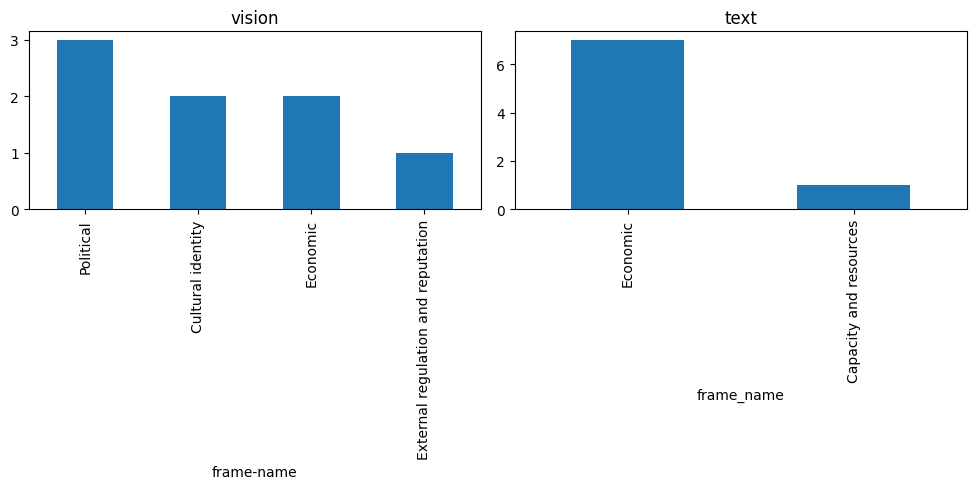

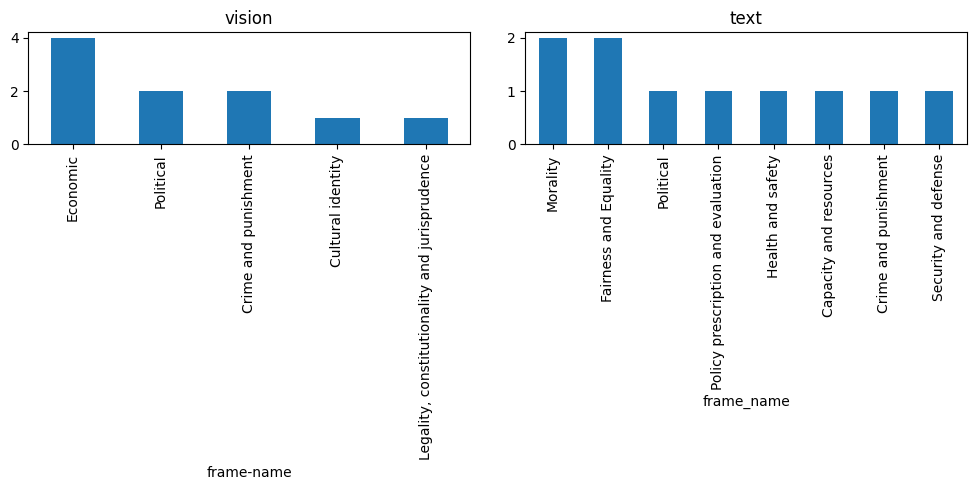

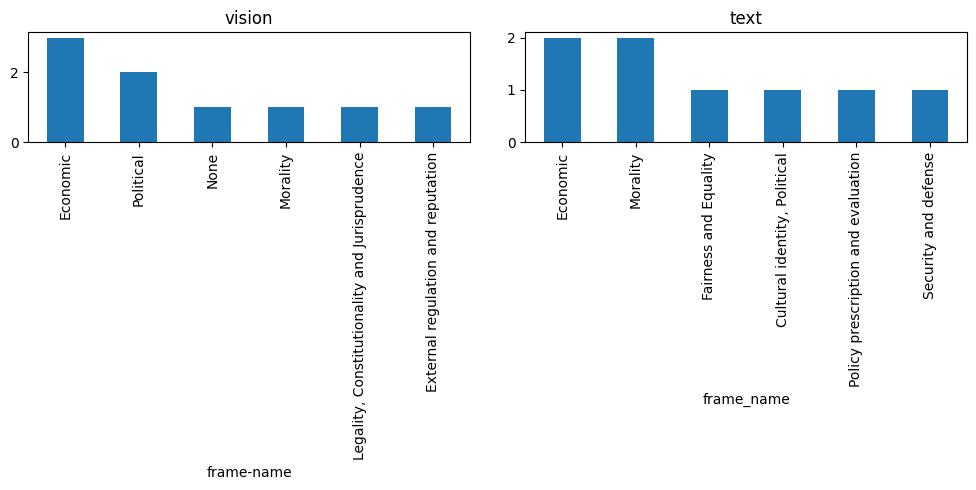

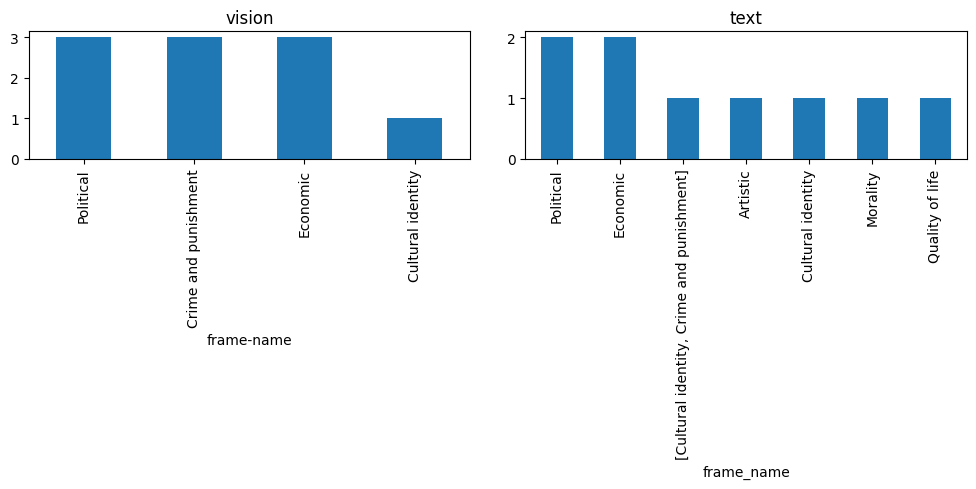

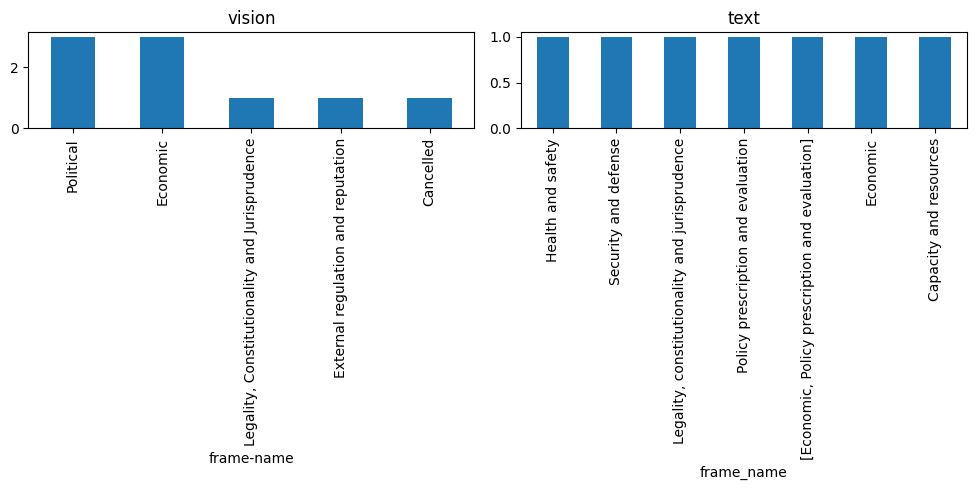

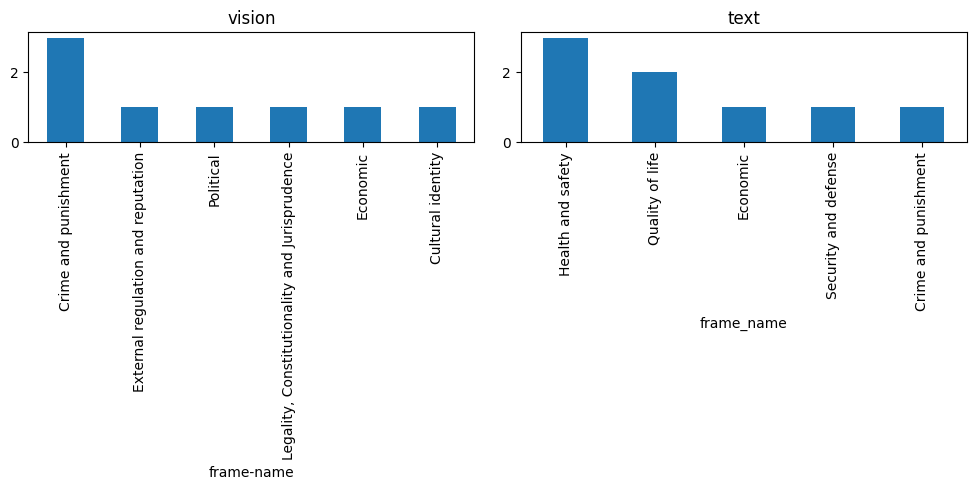

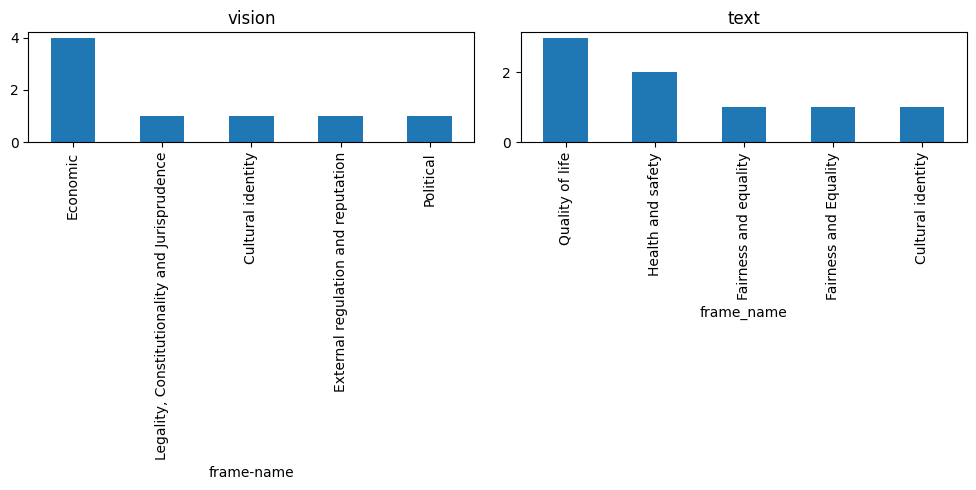

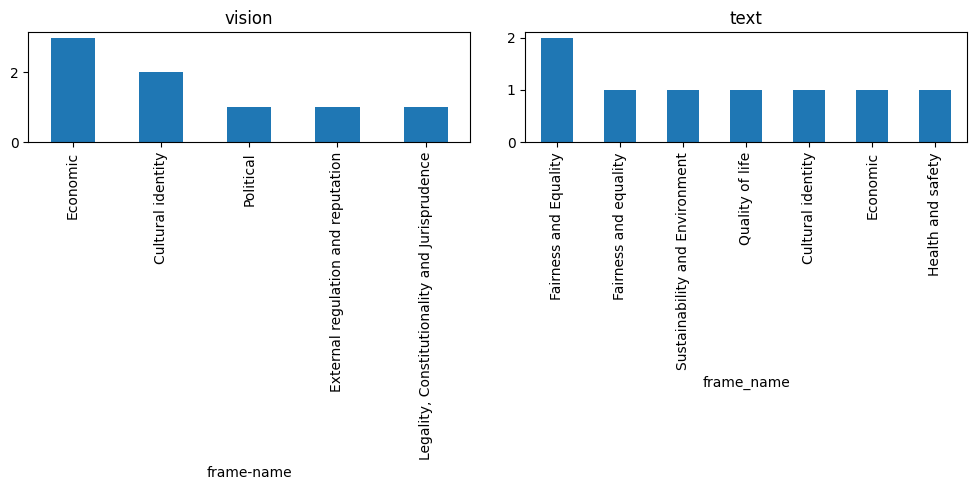

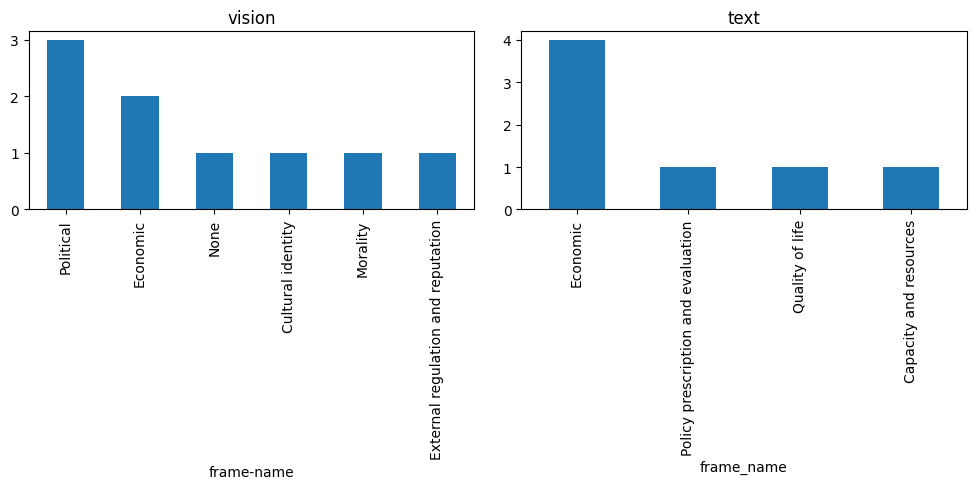

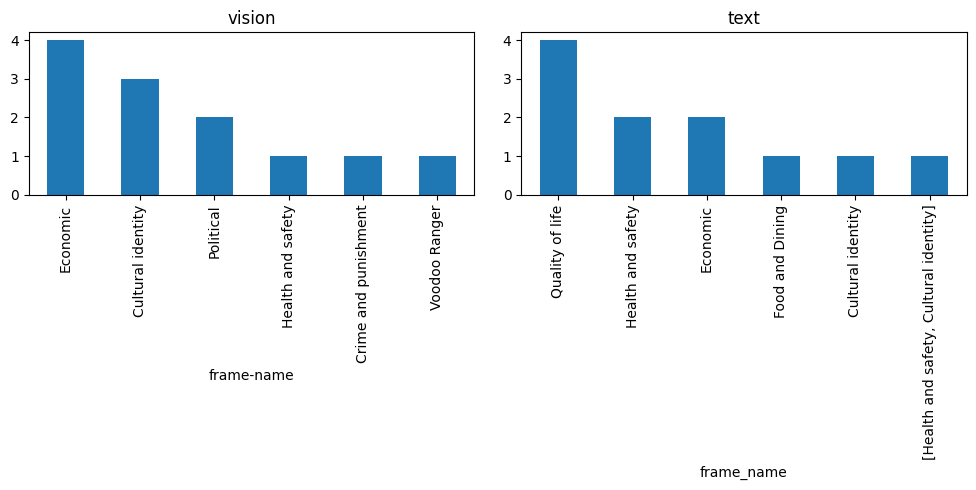

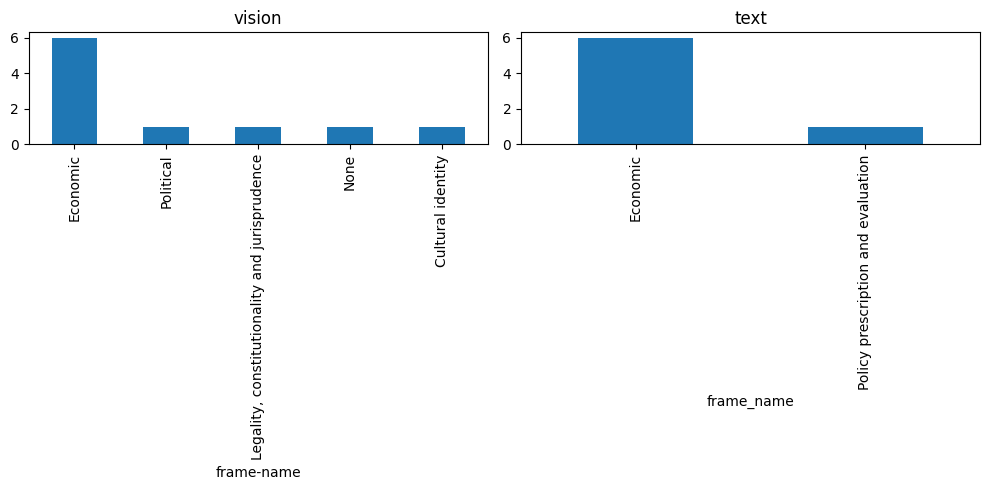

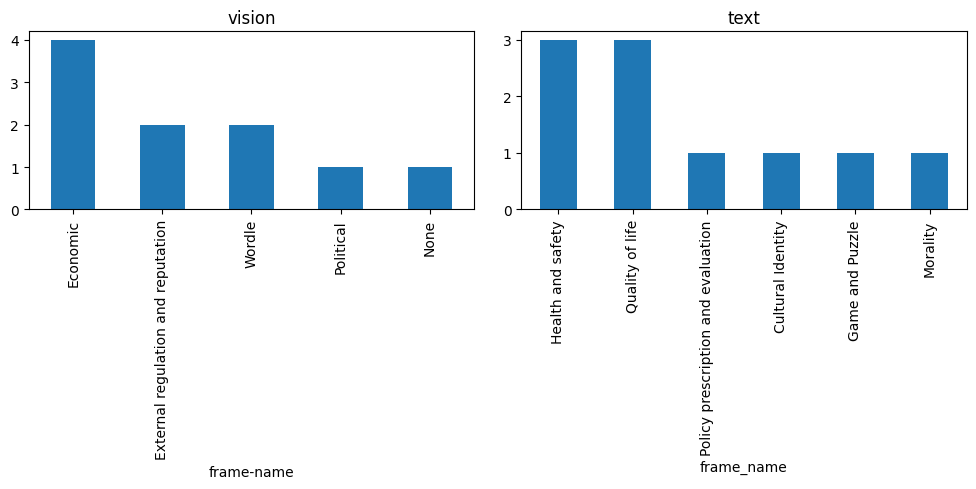

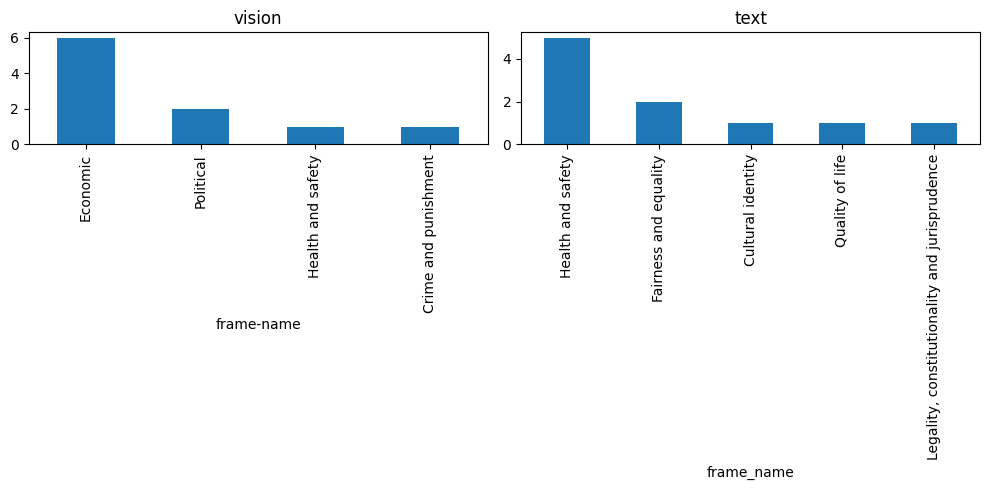

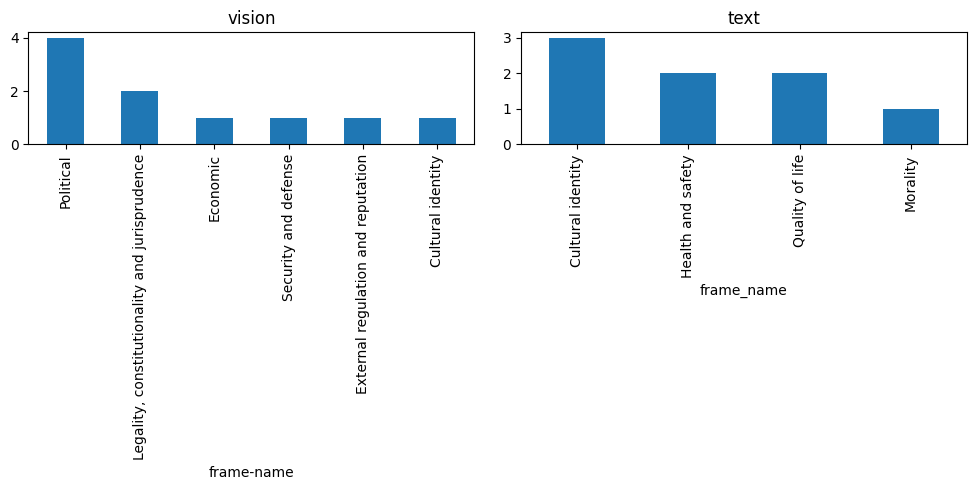

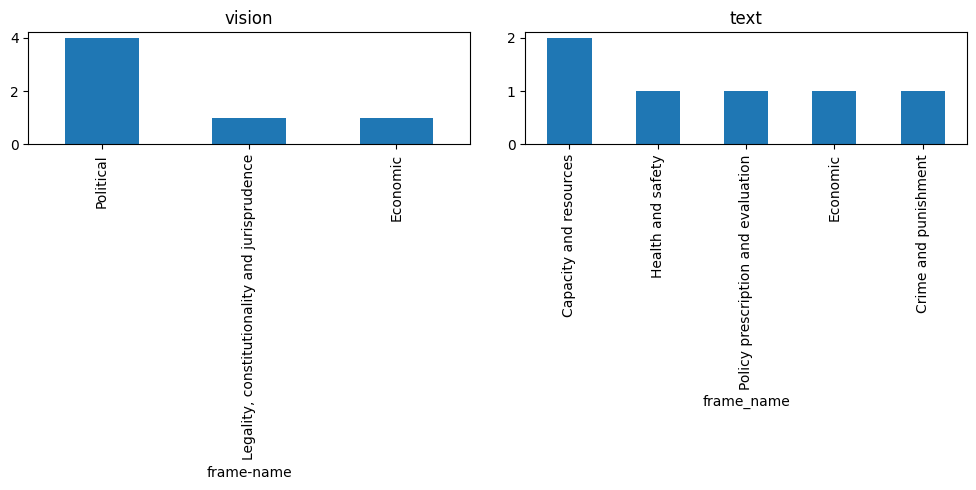

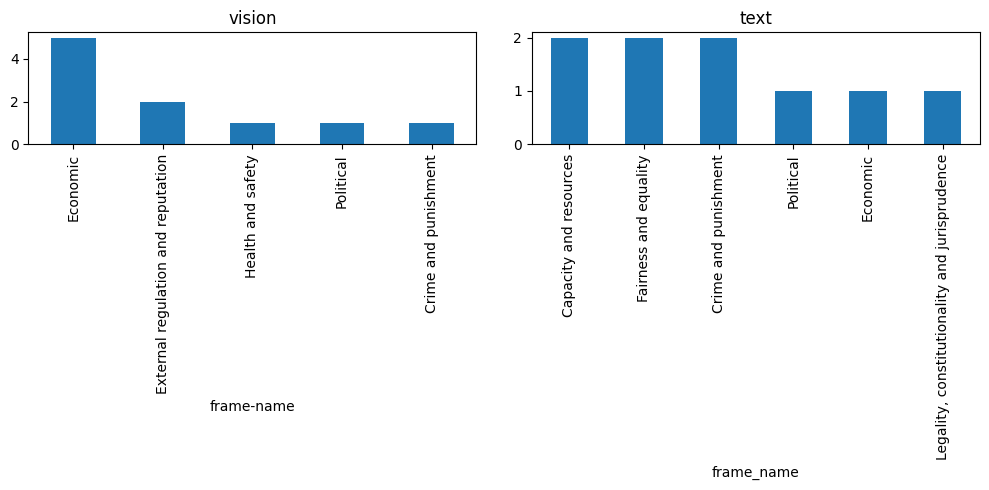

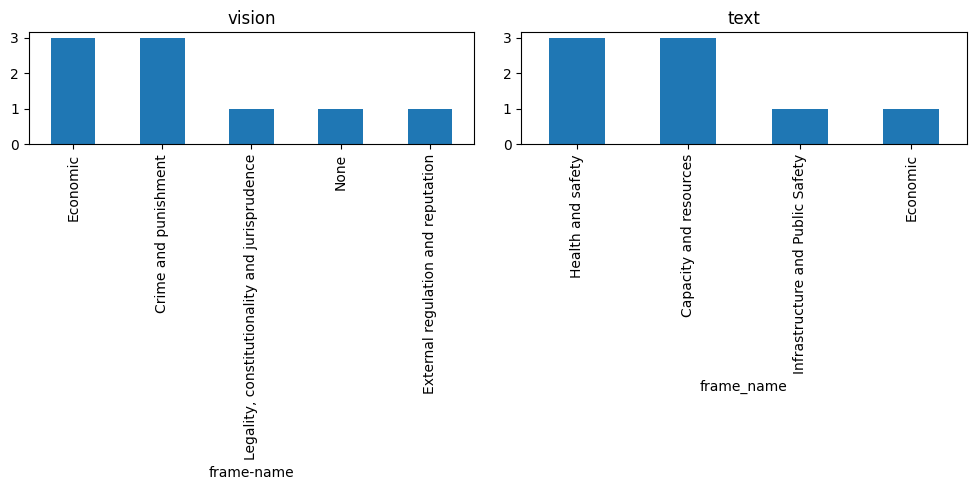

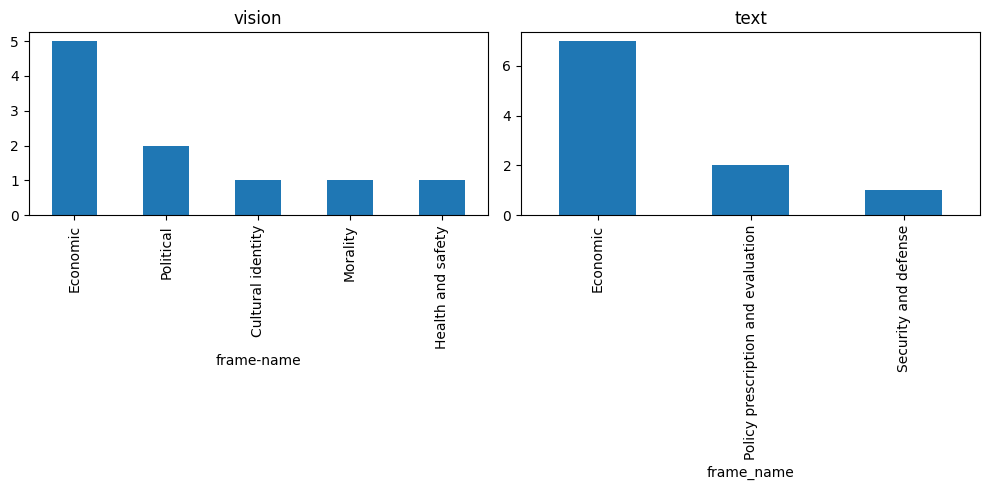

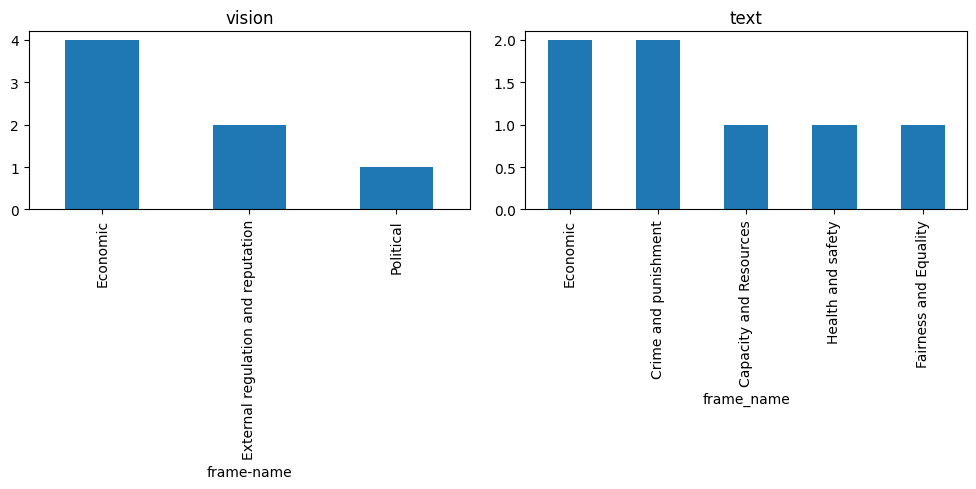

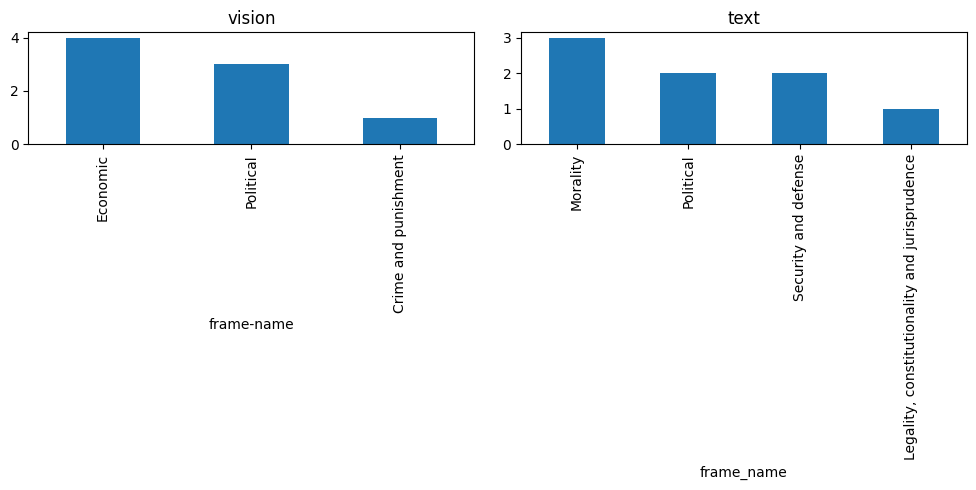

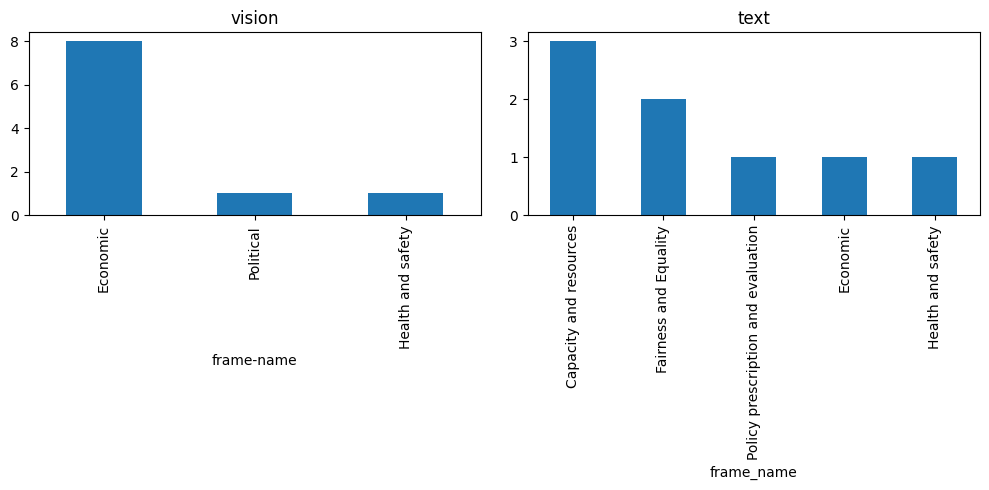

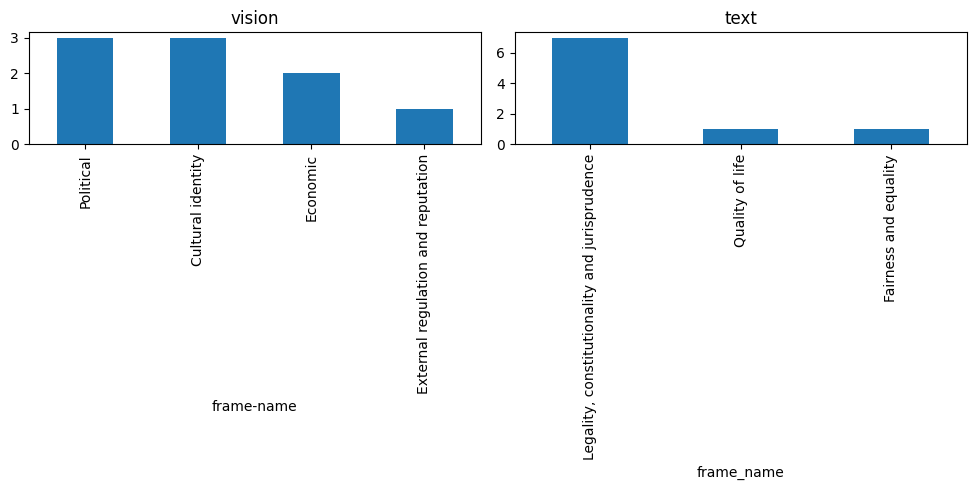

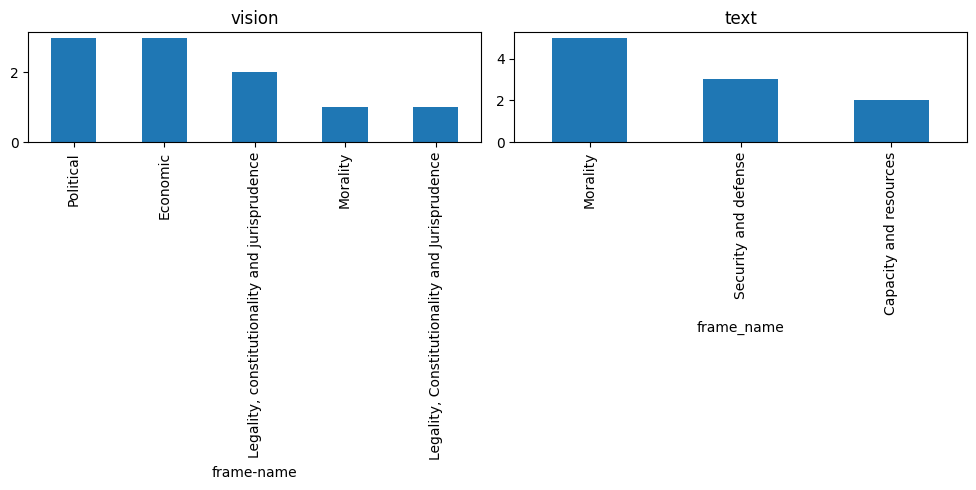

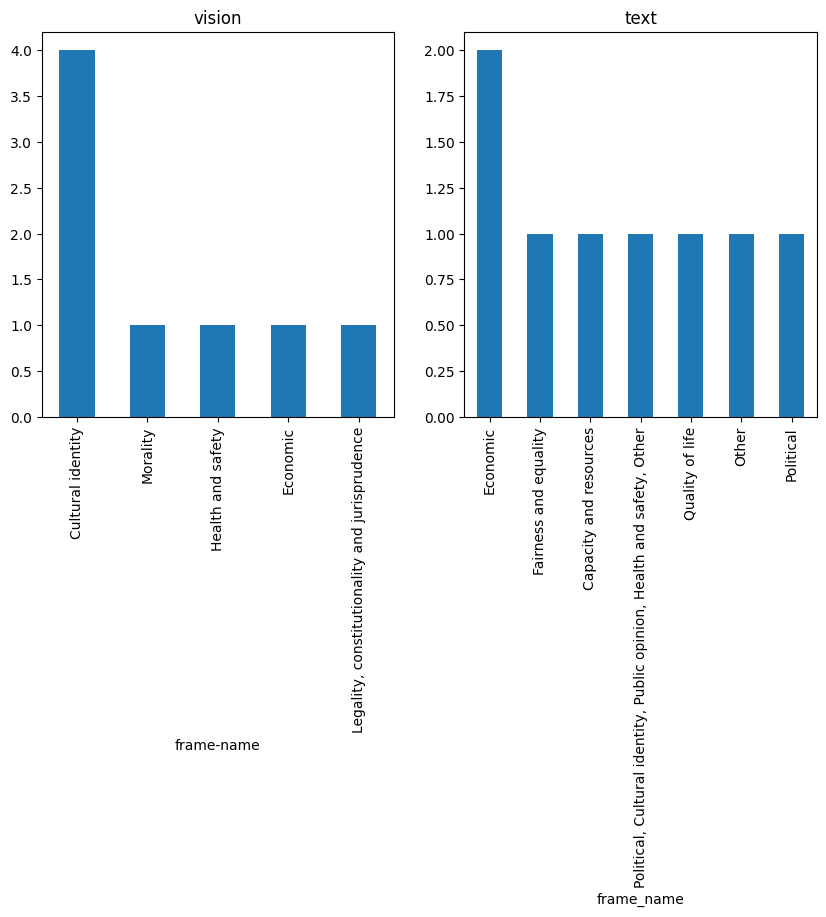

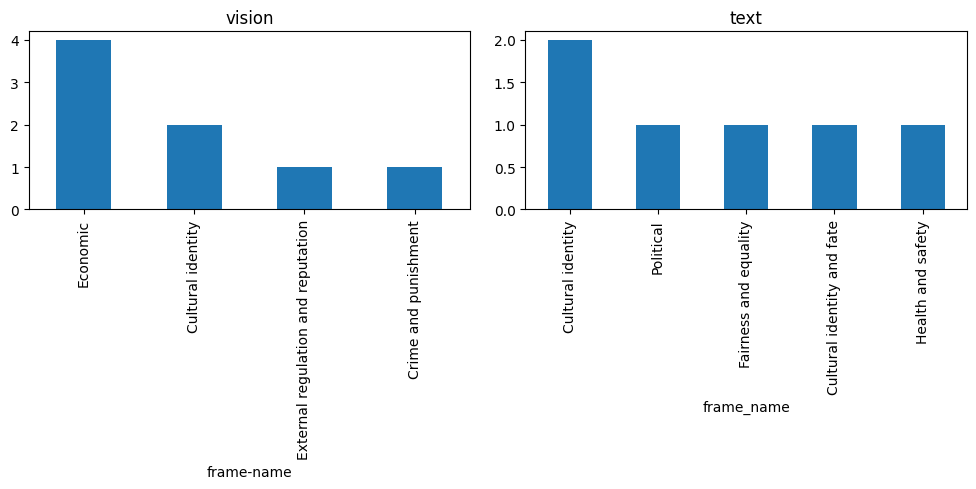

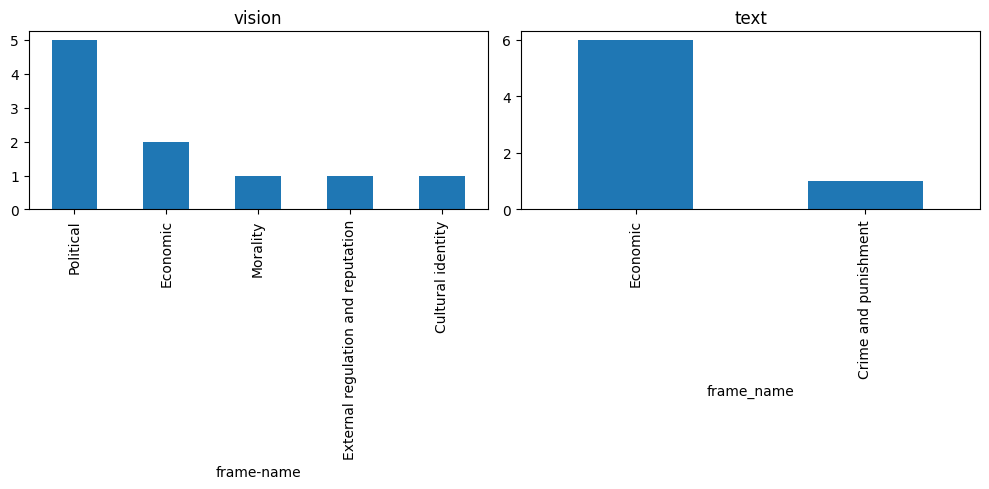

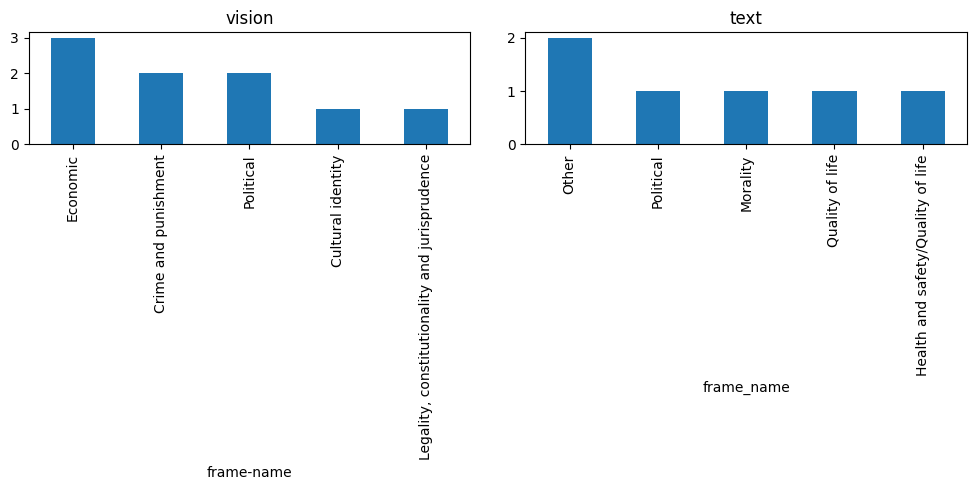

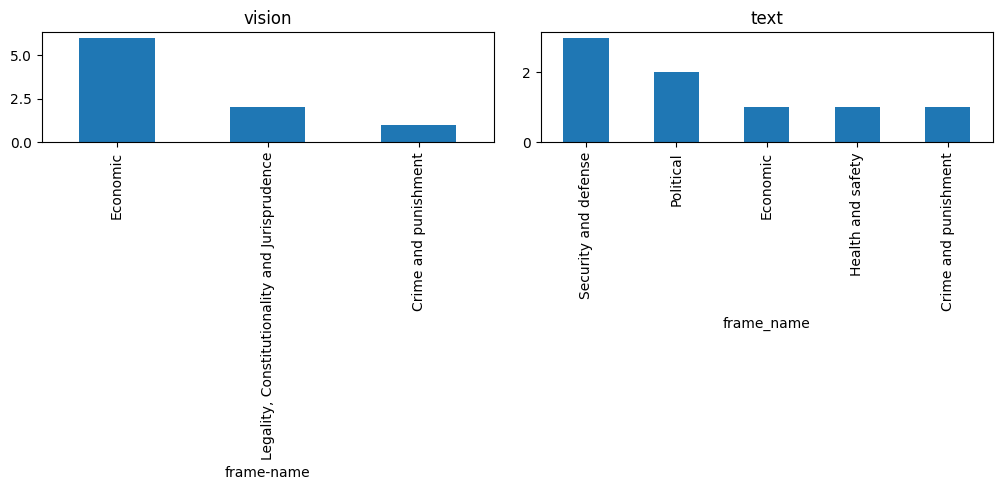

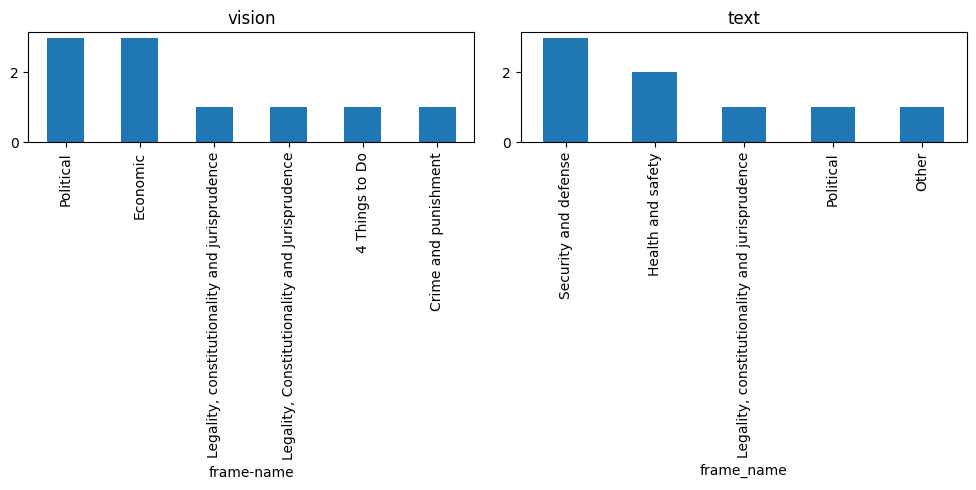

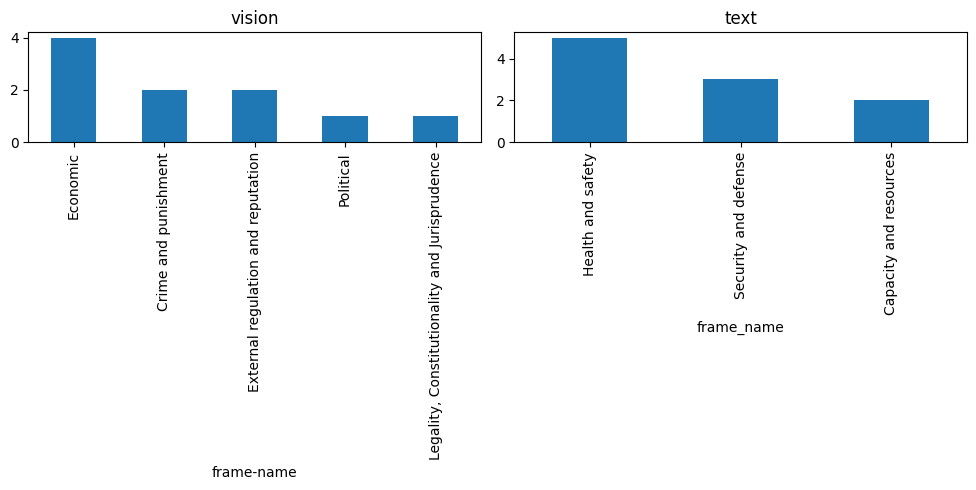

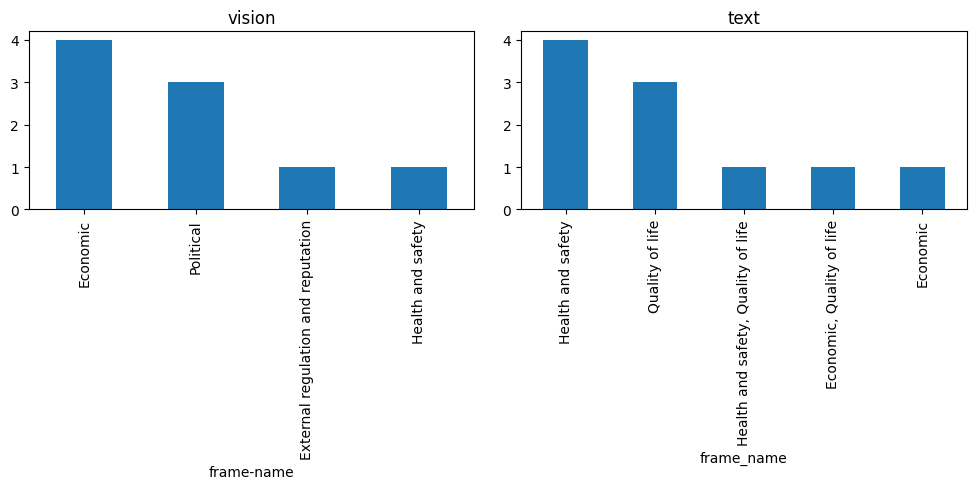

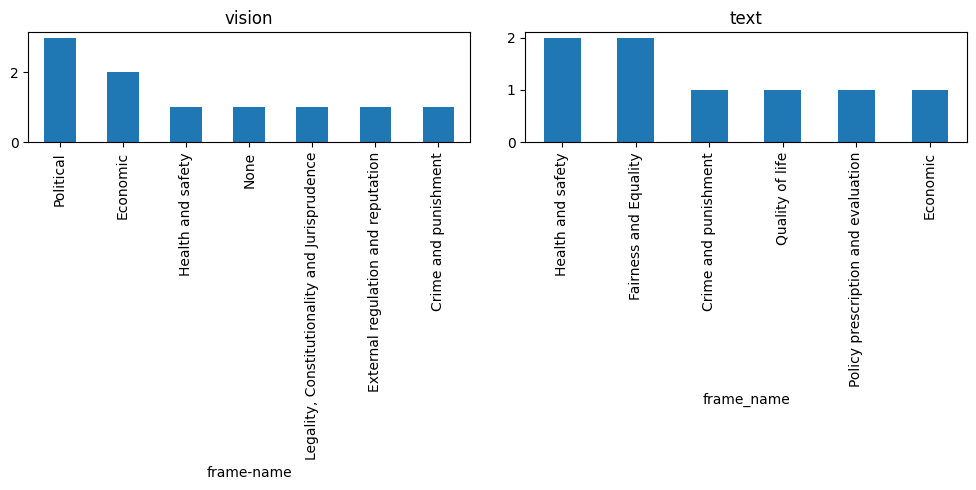

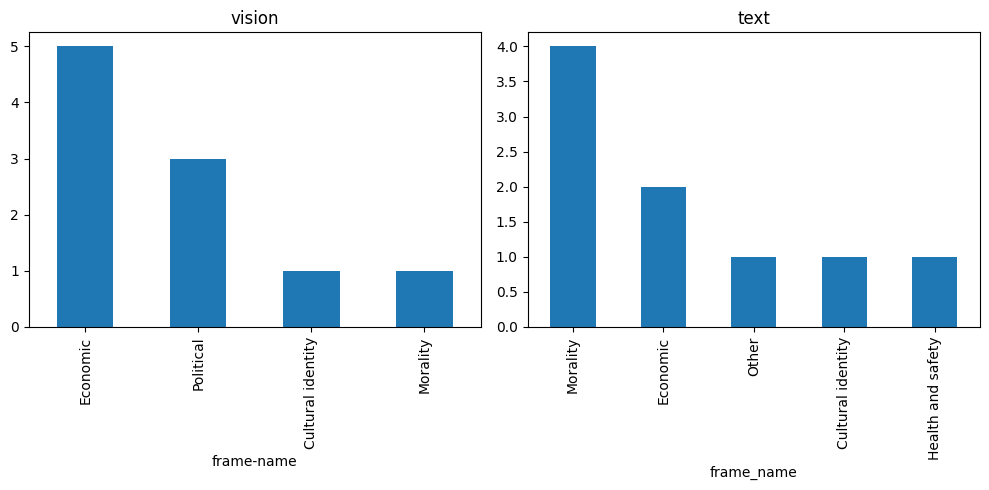

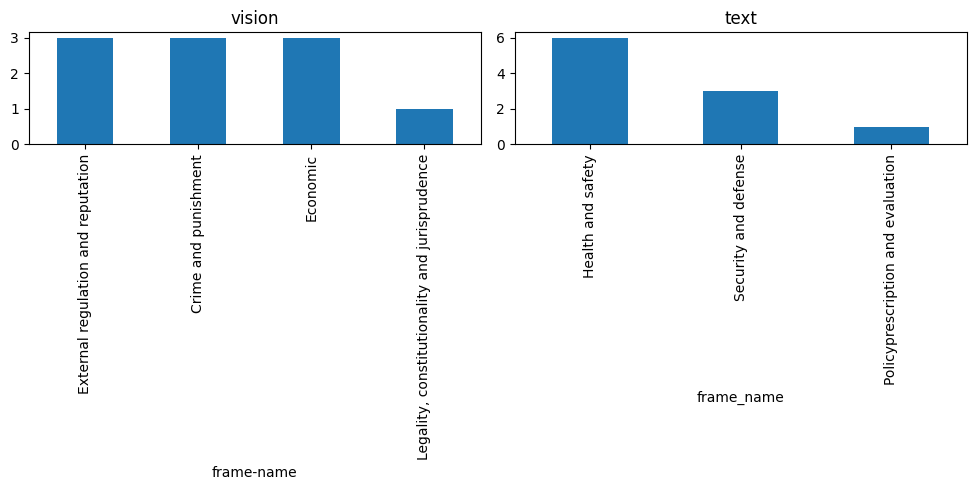

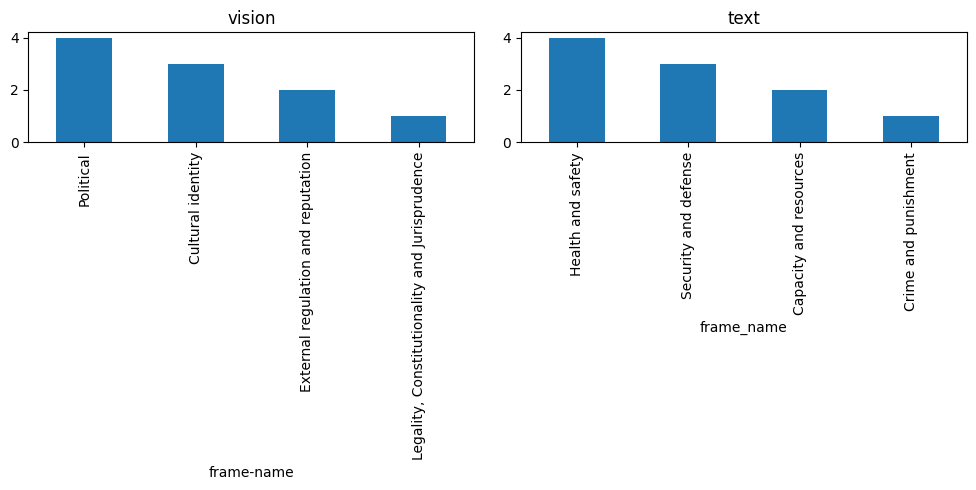

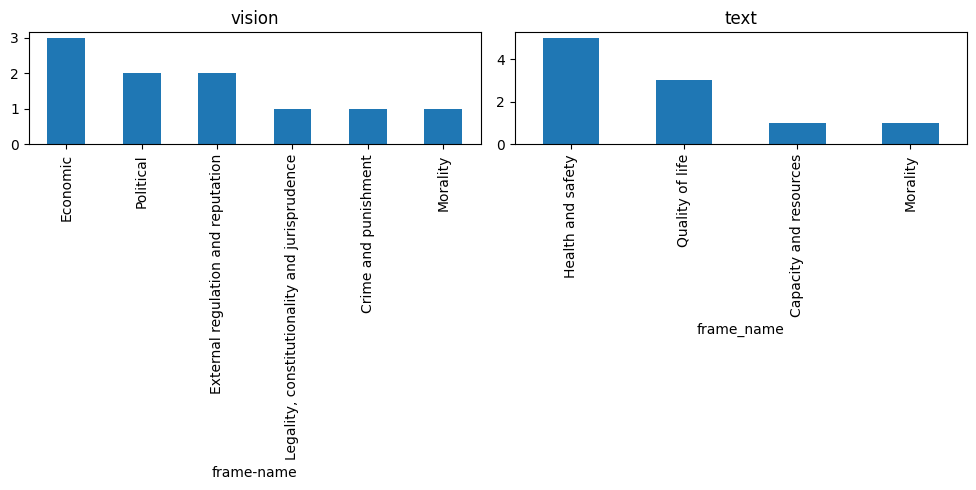

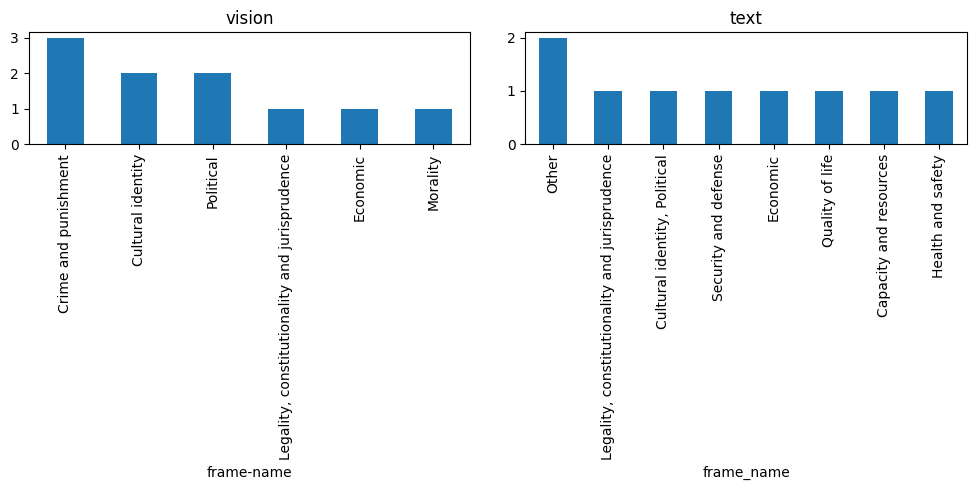

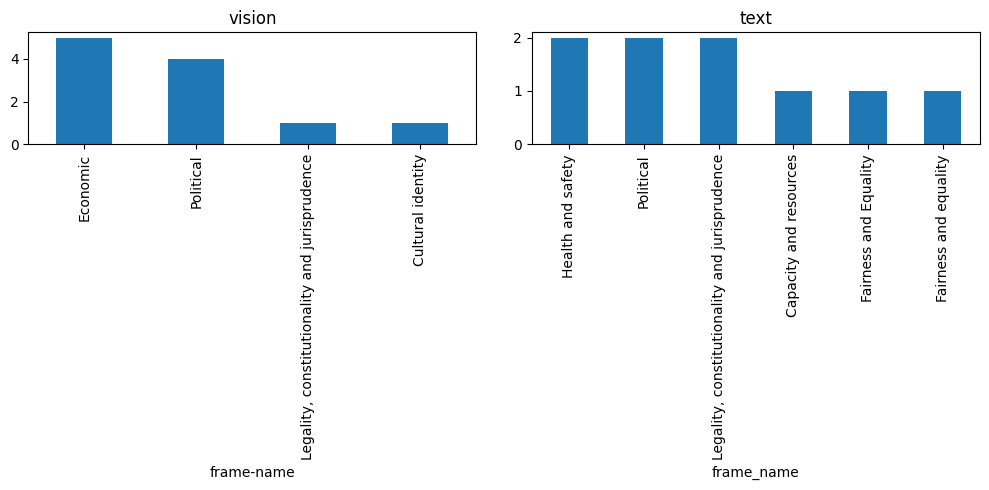

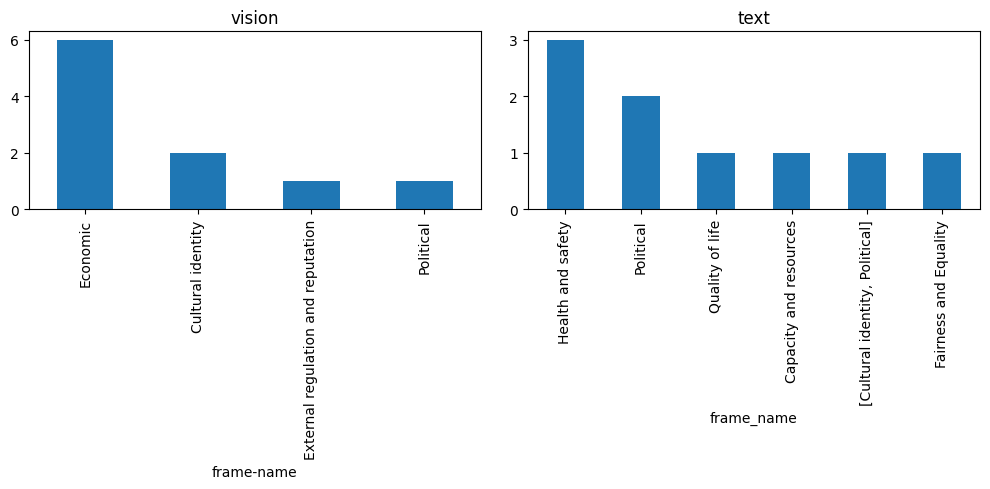

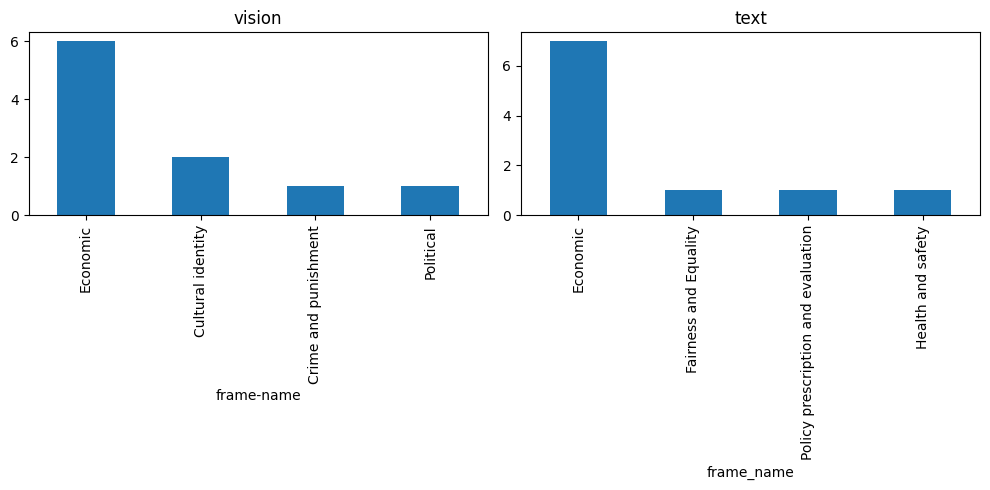

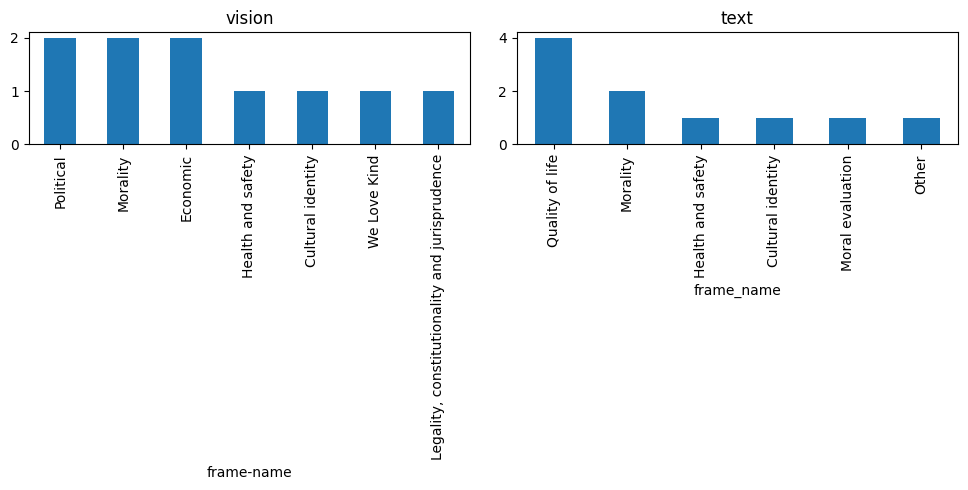

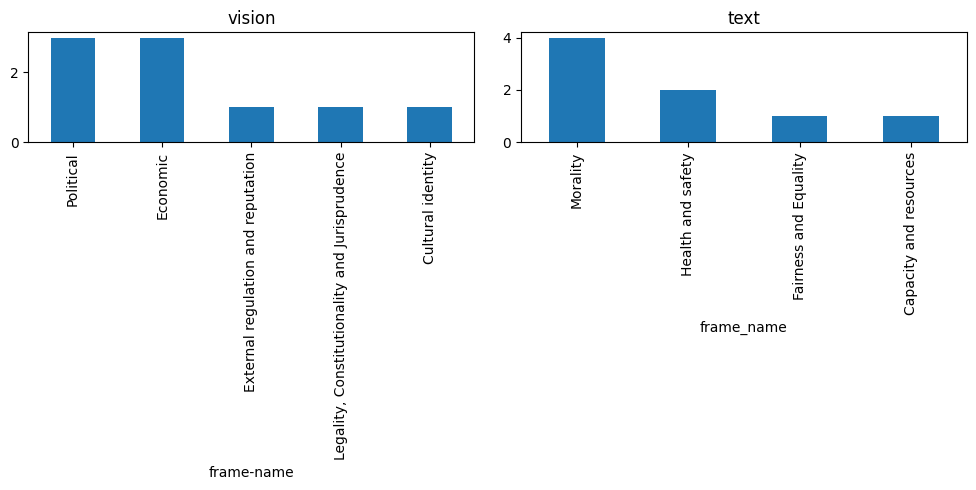

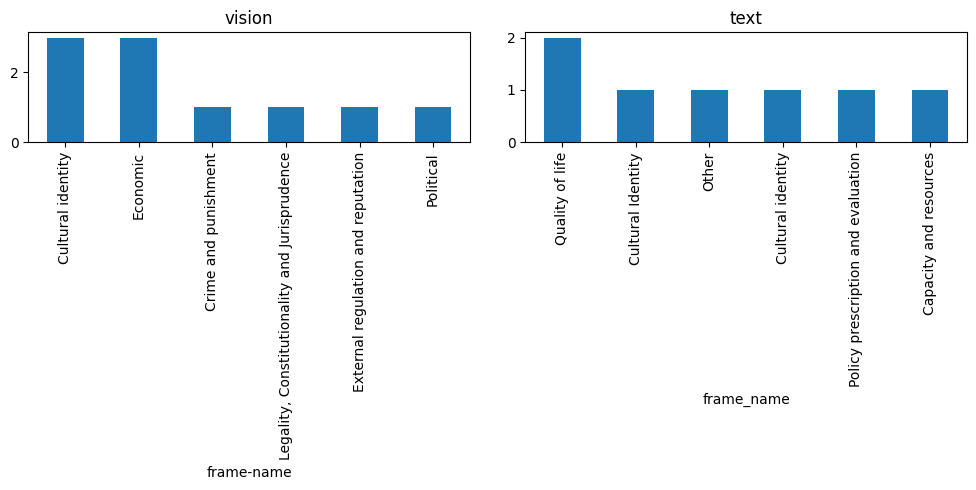

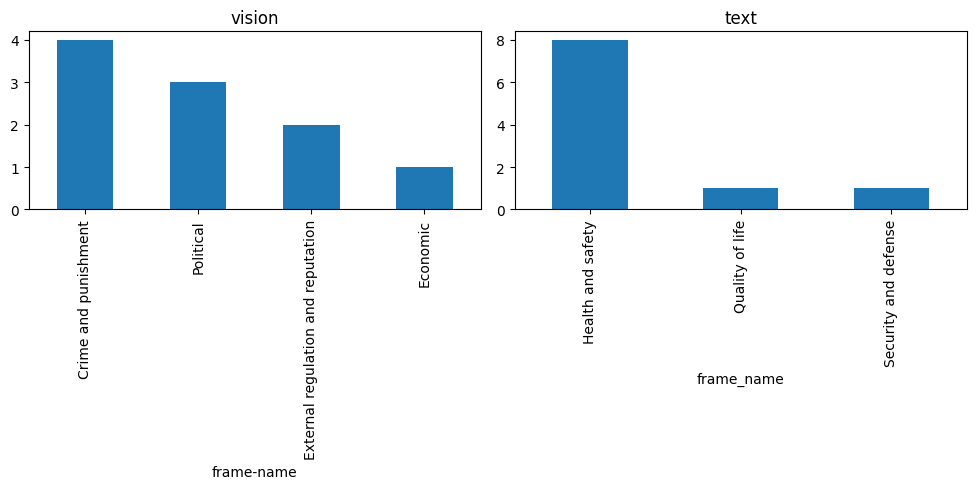

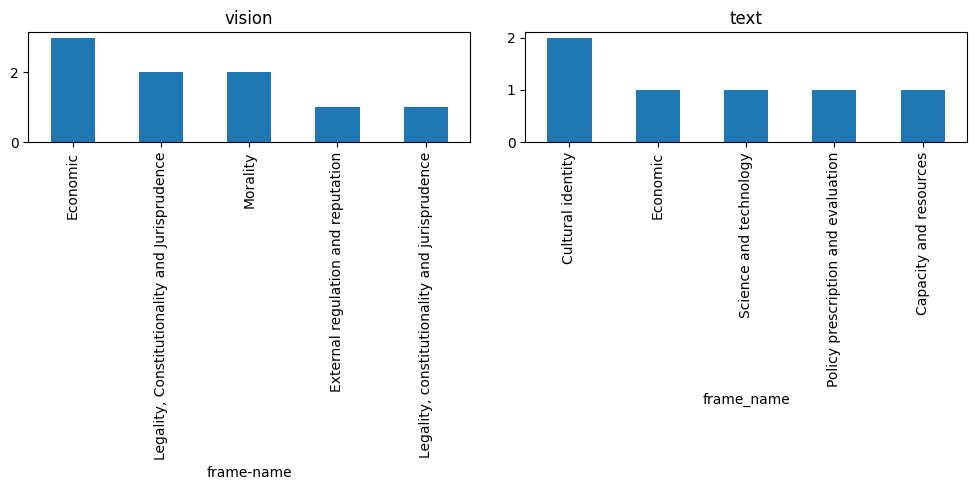

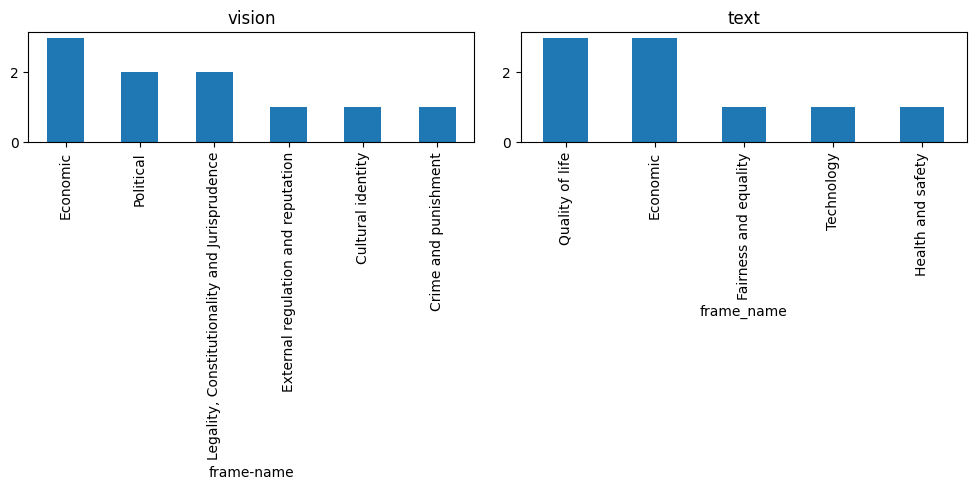

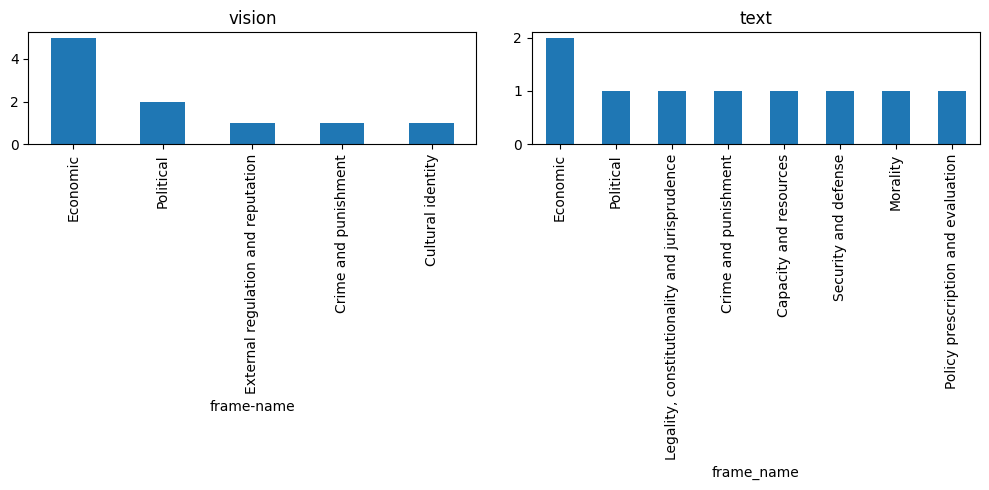

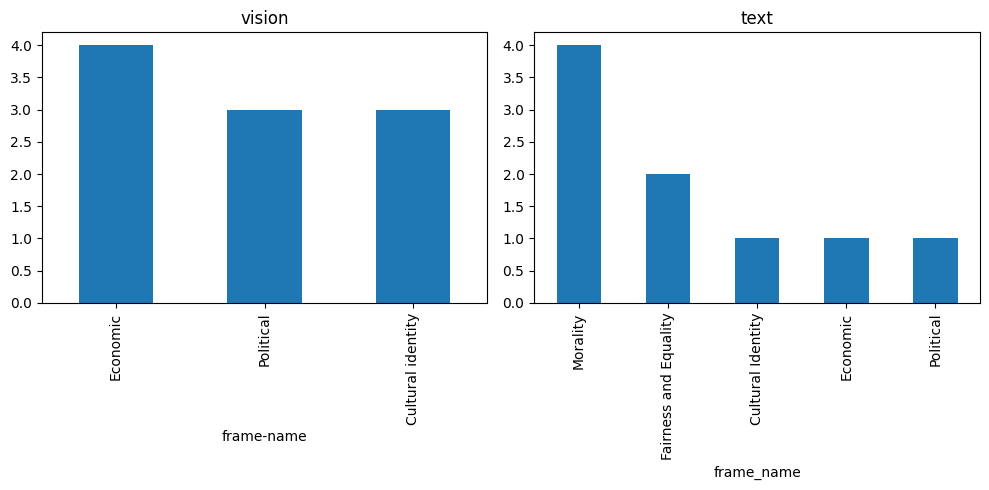

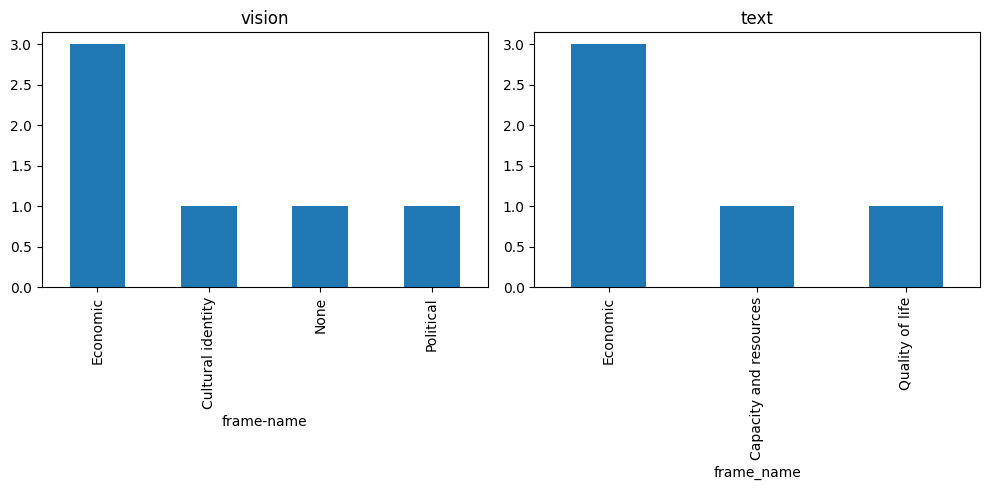

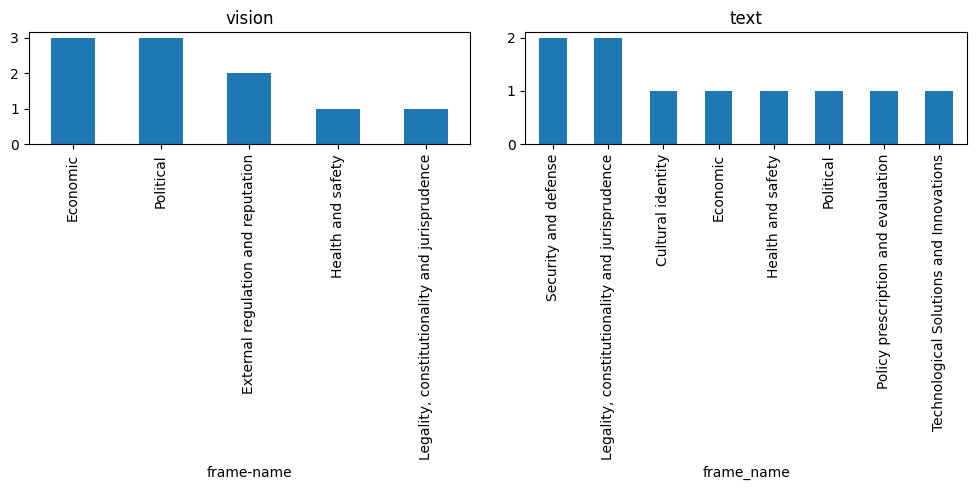

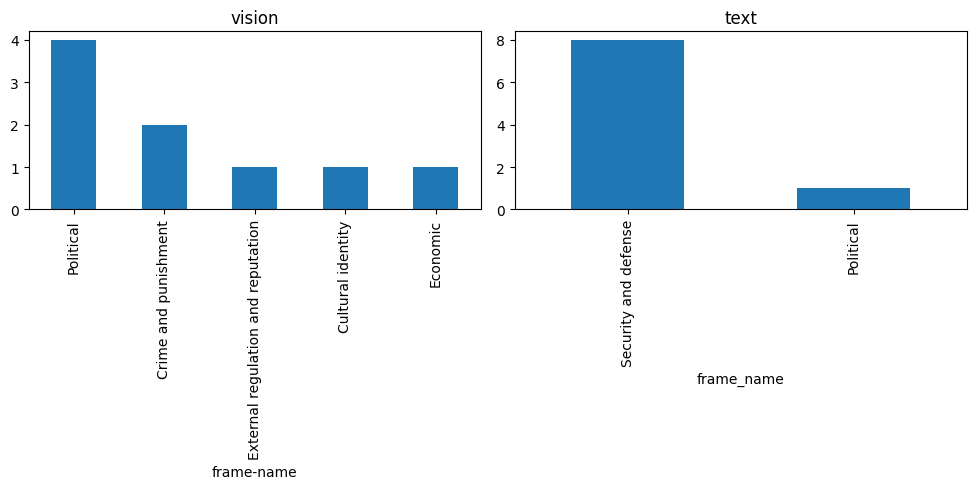

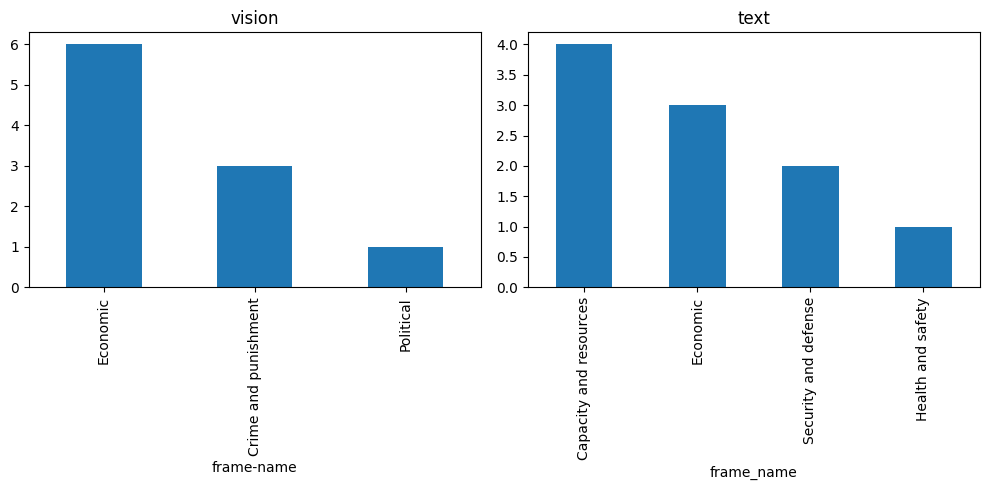

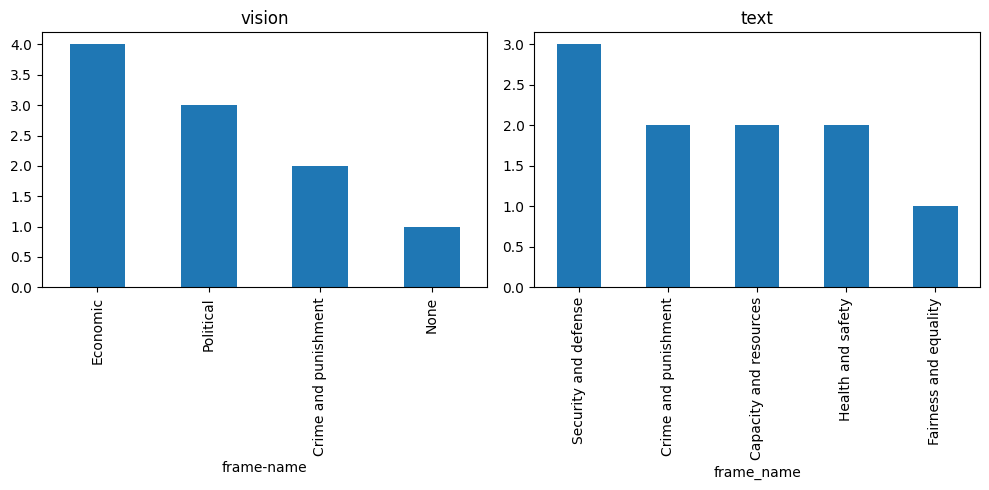

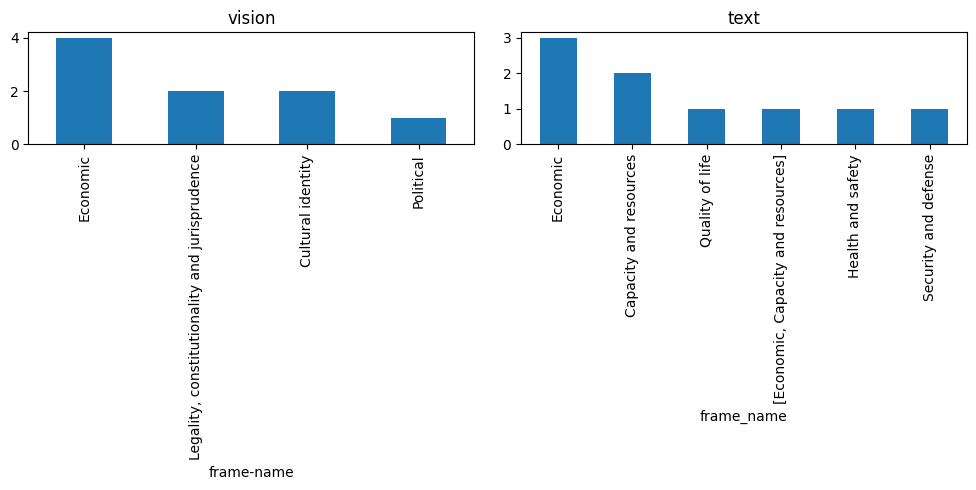

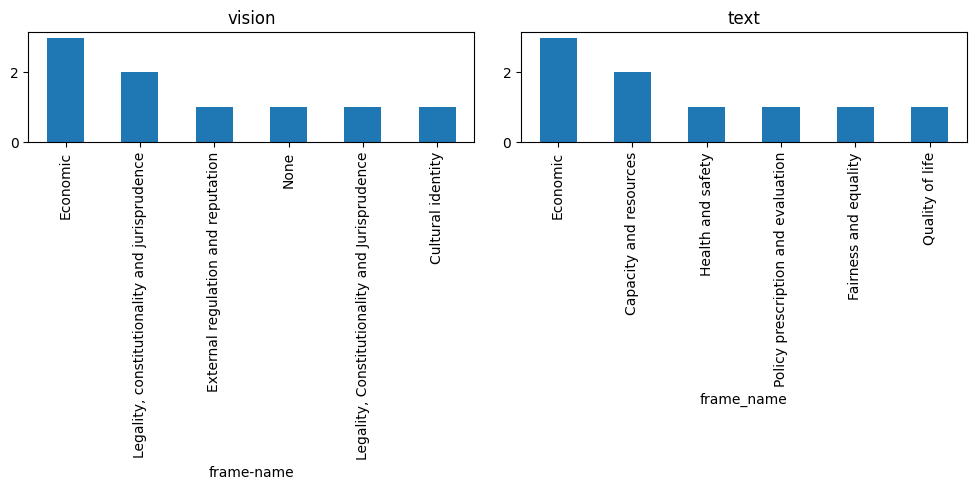

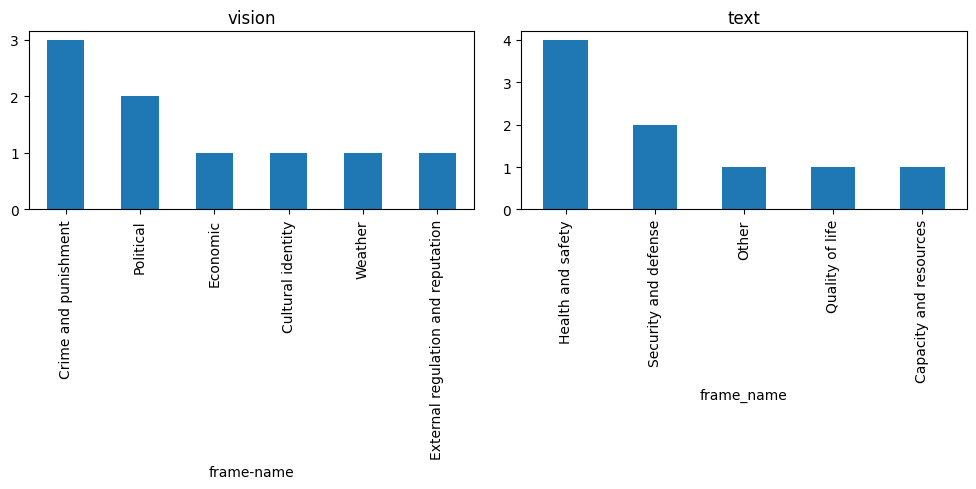

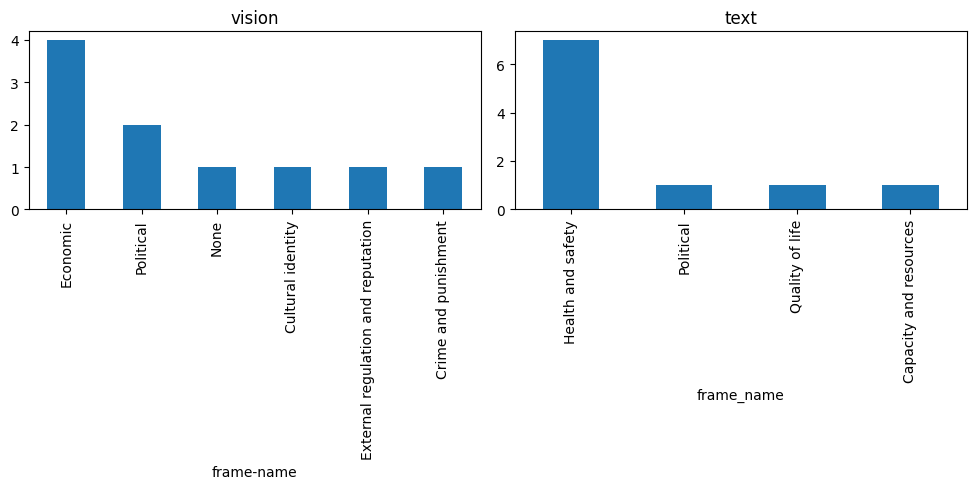

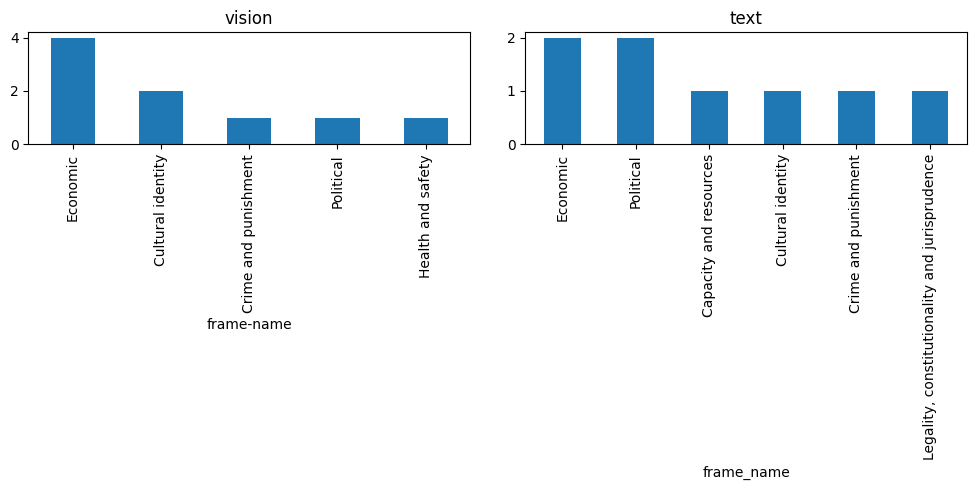

In [38]:
# plt.subplots(figsize=(10, 50))
# plt.tick_params(axis='x', which='major', pad=25)
for i, (group_name, group) in enumerate(merged_df.groupby('topic_label')):
    # fig, axes = plt.subplots(nrows=74, ncols=2, figsize=(15, 5))
    print(group_name)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axe = axes.ravel()
    group['frame-name'].value_counts().plot(kind='bar', ax=axe[0], title='vision')
    group['frame_name'].value_counts().plot(kind='bar', ax=axe[1], title='text')
    plt.tight_layout()
    plt.savefig(f"../data/figures/{group_name}_frames_sample.png")
    # plt.show()

# MFC

In [31]:
og_mfc_df = pd.read_csv("../data/processed/mfc_sample.csv")
mfc_chat_df = pd.read_json("../data/annotated/text/mfc_samples_chat_Mistral.jsonl", lines=True)
mfc_df = pd.read_json("../data/annotated/text/topic_samples_Mistral.jsonl", lines=True)